<img src="https://images.efollett.com/htmlroot/images/templates/storeLogos/CA/864.gif" style="float: right;"> 




# ECON628-01 
### Midterm - Take Home



---
#### Guidelines 
- This is your notebook for your take home midterm. 
- This part of your midterm, as you might expect, is **more challenging** so I highly recommend you to work ASAP. 

- You are required to submit your answers using this notebook (do not push or submit PDFs, Word docs, etc, cause your answers will be considered invalid = **0%**).
- The take home is **15%** of your total midterm score.
- You can work in groups of no more than **3** students.
- Your code **should not be the same** as the rest of your classmates we will check (trust me on this!!), if your code is the same as any of your classmate **your grade will be penalized.**
- The take home is due on **March 20** before class/exam (if you are taking the in-class exam before the rest of the class, you **need** to push your take home part before you commence with the in-class exam) = **NO EXCUSES !!**
- Use this [link][1] to **submit/include** the GitHub link to your take home exam.
[1]: https://docs.google.com/forms/d/e/1FAIpQLSfLkZJY80tw303ss8Ga_2sUMVgumAppWb4tYwssGTbr879_Mw/viewform "link"
- If you find a piece of code online (from someone else), and you decide to use in your midterm, you need:
    - Cite the website from where you are getting the code.
    - **Explain on your "own words" what the code is doing.**
    - If you fail to do this, your grade will be **penalized.**
- Finally, you don't need to 
---

#### The data

The state of Iowa provides many data sets on their website, we will be using a dataset which contains transactions for all stores that have a class E liquor license. 

The data , data dictionary can be found [directly on their website](https://data.iowa.gov/Economy/Iowa-Liquor-Sales/m3tr-qhgy).

**However,** since many of you may have had computer issues reading medium size datasets, **everyone** needs to use the 10% dataset version of Iowa liquor sales, located in your dataset folder. 

---

#### Package imports

Sam Manning

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd
import seaborn as sns

import matplotlib
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

plt.style.use('fivethirtyeight')

## 1. Load the data from file

---

In [2]:
iowads = '/Users/sammanning/Desktop/ECON628-01-sjmanning/datasets/iowa_liquor/Iowa_Liquor_sales_sample_10pct.csv'

iowa = pd.read_csv(iowads)

## 2. Do an initial overview of the data

---

At the very least describe the columns/variables and the datatypes. 

In [3]:
iowa.head(3)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38
1,03/02/2016,2614,DAVENPORT,52807,82.0,Scott,1011100.0,BLENDED WHISKIES,395,27605,Tin Cup,750,$13.75,$20.63,2,$41.26,1.5,0.40
2,02/11/2016,2106,CEDAR FALLS,50613,7.0,Black Hawk,1011200.0,STRAIGHT BOURBON WHISKIES,65,19067,Jim Beam,1000,$12.59,$18.89,24,$453.36,24.0,6.34


In [4]:
iowa.tail(10)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
270945,06/11/2015,2627,DES MOINES,50310,77.0,Polk,1062200.0,PUERTO RICO & VIRGIN ISLANDS RUM,55,44215,Barton Light Rum,100,$0.89,$1.34,48,$64.32,4.80,1.27
270946,11/24/2015,5162,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,301,38176,Titos Vodka,750,$9.65,$14.48,4,$57.92,3.00,0.79
270947,05/12/2015,4375,GRIMES,50111,77.0,Polk,1062310.0,SPICED RUM,260,43334,Captain Morgan Spiced Rum,375,$5.00,$7.50,6,$45.00,2.25,0.59
270948,04/08/2015,2545,IOWA CITY,52245,52.0,Johnson,1062300.0,FLAVORED RUM,35,43145,Bacardi Pineapple Fusion,750,$8.50,$12.75,3,$38.25,2.25,0.59
270949,07/21/2015,2529,CEDAR RAPIDS,52405,57.0,Linn,1031100.0,100 PROOF VODKA,300,36887,McCormick Vodka,1000,$4.13,$6.20,3,$18.60,3.00,0.79
270950,12/22/2015,4057,DES MOINES,50316,77.0,Polk,1022100.0,TEQUILA,410,88291,Patron Tequila Silver Mini,300,$20.30,$30.45,4,$121.80,1.20,0.32
270951,11/04/2015,5151,IDA GROVE,51445,47.0,Ida,1011200.0,STRAIGHT BOURBON WHISKIES,259,17956,Evan Williams Str Bourbon,750,$7.47,$11.21,3,$33.63,2.25,0.59
270952,10/20/2015,5152,WATERLOO,50702,7.0,Black Hawk,1011300.0,TENNESSEE WHISKIES,85,26826,Jack Daniels Old #7 Black Lbl,750,$15.07,$22.61,6,$135.66,4.50,1.19
270953,11/20/2015,3562,WEST BURLINGTON,52655,29.0,Des Moines,1082900.0,MISC. IMPORTED CORDIALS & LIQUEURS,192,65258,Jagermeister Liqueur,1750,$26.05,$39.08,6,$234.48,10.50,2.77
270954,01/27/2015,4446,URBANDALE,50322,77.0,Polk,1031080.0,VODKA 80 PROOF,260,37993,Smirnoff Vodka 80 Prf,200,$2.75,$4.13,8,$33.04,1.60,0.42


In [5]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
Date                     270955 non-null object
Store Number             270955 non-null int64
City                     270955 non-null object
Zip Code                 270955 non-null object
County Number            269878 non-null float64
County                   269878 non-null object
Category                 270887 non-null float64
Category Name            270323 non-null object
Vendor Number            270955 non-null int64
Item Number              270955 non-null int64
Item Description         270955 non-null object
Bottle Volume (ml)       270955 non-null int64
State Bottle Cost        270955 non-null object
State Bottle Retail      270955 non-null object
Bottles Sold             270955 non-null int64
Sale (Dollars)           270955 non-null object
Volume Sold (Liters)     270955 non-null float64
Volume Sold (Gallons)    270955 non-null float64
dtypes: float64(4), int64(

In [6]:
iowa.describe().T

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,count,mean,std,min,25%,50%,75%,max
Store Number,270955.0,3.590264e+03,947.662050,2106.00,2604.0,3722.00,4378.00,9023.00
County Number,269878.0,5.723164e+01,27.341205,1.00,NaN,NaN,NaN,99.00
Category,270887.0,1.043888e+06,50182.111075,1011100.00,NaN,NaN,NaN,1701100.00
Vendor Number,270955.0,2.564344e+02,141.014890,10.00,115.0,260.00,380.00,978.00
Item Number,270955.0,4.597496e+04,52757.043086,168.00,26827.0,38176.00,64573.00,995507.00
Bottle Volume (ml),270955.0,9.248303e+02,493.088489,50.00,750.0,750.00,1000.00,6000.00
Bottles Sold,270955.0,9.871285e+00,24.040912,1.00,2.0,6.00,12.00,2508.00
Volume Sold (Liters),270955.0,8.981351e+00,28.913690,0.10,1.5,5.25,10.50,2508.00
Volume Sold (Gallons),270955.0,2.372830e+00,7.638182,0.03,0.4,1.39,2.77,662.54


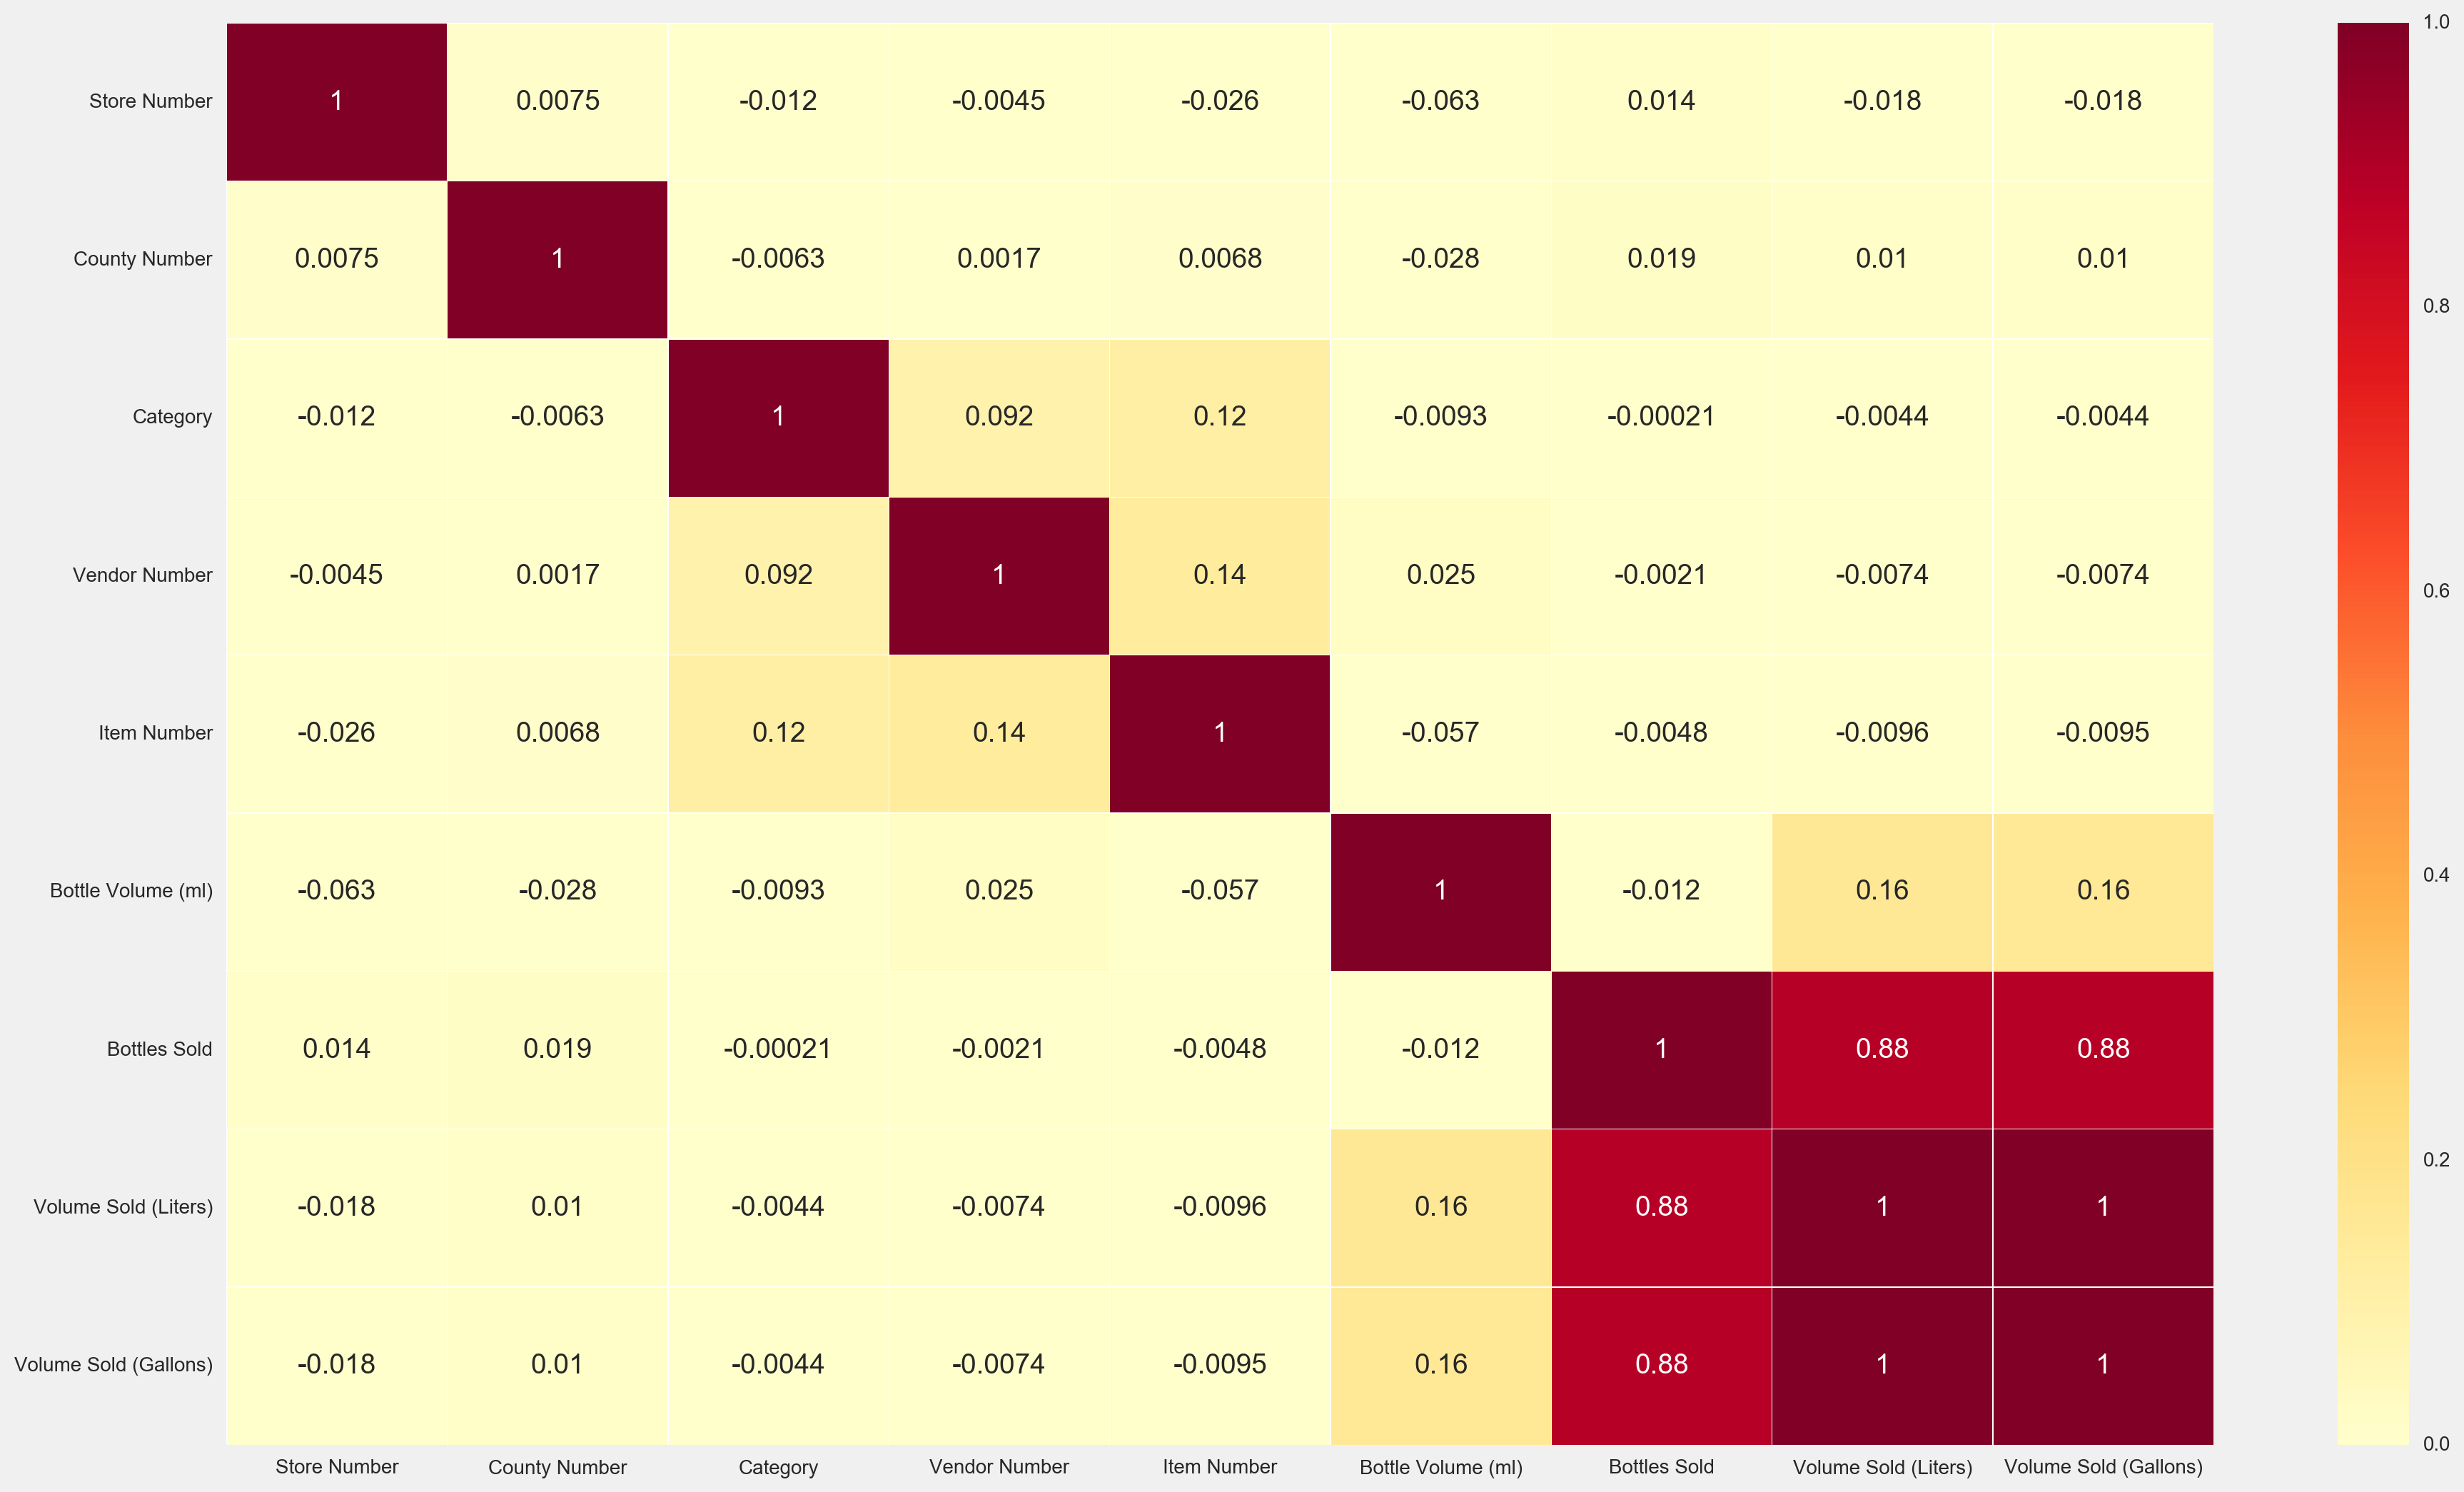

In [7]:
fig = plt.figure(figsize=(20,12))
ax = fig.gca()
sns.heatmap(iowa.corr(), annot=True, linewidths=.15, cmap="YlOrRd", vmin=0, vmax=1, ax=ax)
plt.show()

In [8]:
## There don't seem to be any interesting correlations here. Maybe the data will prove more 
## interesting once we look at particular places, stores, or liquor types within Iowa. 


## 3. Clean the dataset

---

### 3.1 Identify columns that you will need to convert and clean. Where and how is the data corrupted?

Don't worry about converting the date column to a pandas/numpy "datetime" datatype, unless you want to (not required for these problems and is a challenging thing to work with in its own right.)

In [9]:
## First I am going to rename all of the variables that have spaces in them

In [10]:
# Going to show the head again so I can see what column names I need to change

iowa.head(1)

,Date,Store Number,City,Zip Code,County Number,County,Category,Category Name,Vendor Number,Item Number,Item Description,Bottle Volume (ml),State Bottle Cost,State Bottle Retail,Bottles Sold,Sale (Dollars),Volume Sold (Liters),Volume Sold (Gallons)
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38


In [11]:
iowa.rename(columns={
        'Store Number':'store_number',
        'Zip Code':'zip_code',
        'County Number':'county_number',
        'Category Name':'category_name',
        'Vendor Number':'vendor_number',
        'Item Number':'item_number',
        'Item Description':'item_description',
        'Bottle Volume (ml)':'ml_per_bottle',
        'State Bottle Cost':'state_bottle_cost',
        'State Bottle Retail':'state_bottle_retail',
        'Bottles Sold':'bottles_sold',
        'Sale (Dollars)':'sale_dollars',
        'Volume Sold (Liters)':'liters_sold',
        'Volume Sold (Gallons)':'gallons_sold'
    }, inplace=True)

In [12]:
# Checking to see if it worked

iowa.head(1)

,Date,store_number,City,zip_code,county_number,County,Category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38


In [13]:
## Renaming column names with capital letters.

iowa.rename(columns={
        'Date':'date',
        'City':'city',
        'County':'county',
        'Category':'category'
    }, inplace=True)

In [14]:
iowa.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold
0,11/04/2015,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,$4.50,$6.75,12,$81.00,9.0,2.38


In [15]:
## I am going to turn bottle cost,state bottle retail, and sale(dollars) into floats. 

In [16]:
## I found this code to remove dollar signs here:
## http://stackoverflow.com/questions/38516481/trying-to-remove-commas-and-dollars-signs-with-pandas-in-python
## The first line of code removes the dollor sign from each observation in the column of 
## the dataframe. The second line of code changes the column from a string to a float. 

iowa['state_bottle_cost'] = iowa['state_bottle_cost'].str.replace('$', '')
iowa['state_bottle_cost'] = iowa['state_bottle_cost'].astype(float)

In [17]:
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].str.replace('$', '')
iowa['state_bottle_retail'] = iowa['state_bottle_retail'].astype(float)
iowa['sale_dollars'] = iowa['sale_dollars'].str.replace('$', '')
iowa['sale_dollars'] = iowa['sale_dollars'].astype(float)

In [18]:
iowa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270955 entries, 0 to 270954
Data columns (total 18 columns):
date                   270955 non-null object
store_number           270955 non-null int64
city                   270955 non-null object
zip_code               270955 non-null object
county_number          269878 non-null float64
county                 269878 non-null object
category               270887 non-null float64
category_name          270323 non-null object
vendor_number          270955 non-null int64
item_number            270955 non-null int64
item_description       270955 non-null object
ml_per_bottle          270955 non-null int64
state_bottle_cost      270955 non-null float64
state_bottle_retail    270955 non-null float64
bottles_sold           270955 non-null int64
sale_dollars           270955 non-null float64
liters_sold            270955 non-null float64
gallons_sold           270955 non-null float64
dtypes: float64(7), int64(5), object(6)
memory usage: 37.2+

In [19]:
## Converting the date to a "datetime" data type.
## Found the following very simple code here: http://stackoverflow.com/questions/17134716/convert-dataframe-column-type-from-string-to-datetime

iowa['date'] = pd.to_datetime(iowa['date'])

In [20]:
## Creating new columns showing the month and year of the transaction
## Adapted the code found here: http://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
## This code sets a new column name 'year' or 'month' equal to the year or month in the 
## pandas/numpy 'datetime' variable type column date, that I had. 

iowa['year'] = iowa['date'].dt.year
iowa['month'] = iowa['date'].dt.month

In [21]:
iowa.head(1)

,date,store_number,city,zip_code,county_number,county,category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold,year,month
0,2015-11-04,3717,SUMNER,50674,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.5,6.75,12,81.0,9.0,2.38,2015,11


In [22]:
## Checking for null values

iowa.isnull().sum(axis=0)

date                      0
store_number              0
city                      0
zip_code                  0
county_number          1077
county                 1077
category                 68
category_name           632
vendor_number             0
item_number               0
item_description          0
ml_per_bottle             0
state_bottle_cost         0
state_bottle_retail       0
bottles_sold              0
sale_dollars              0
liters_sold               0
gallons_sold              0
year                      0
month                     0
dtype: int64

In [23]:
## The only missing values seem to be in the county, category, category name and county number columns. I don't think 
## it makes sense to replace any of these missing values yet. 

### 3.2 Clean the columns

In [24]:
## See above. For those columns where it was necessary, I converted the data type 
## from string to float. I will clean more throughout the rest of the exam as is necessary.


### 3.3 Perform more extensive cleaning of the dataset

Cleaning of data can mean a lot more than just fixing strings and numbers in columns. There are often logical errors with data, useless or nonsensical categories, redundancy of information, outliers, and many more problems.

This dataset has problems beyond just fixing the types of columns. Keep in mind that some types of "data cleaning" is subjective: it's not always a cut-and-dry conversion of type or removal of null values. Subjectivity when dealing with data is just a fact of life when dealing with data. This isn't a kind of programming where things are just right or wrong.

In [25]:
## I'm hesitant to do much more data cleaning before knowing what questions I need to answer. 
## I am going to look at the questions below to see what further data cleaning might make the 
## most sense, and then I will clean as I go. For now, it looks like I definitely won't need 
## the zip-code column, so I will drop that.

## Dropping zip code

iowa = iowa.drop(["zip_code",],axis=1)


## 4. Filter/adjust the store data

---

Some stores may have opened or closed in 2015. These stores will have incorrect yearly summary statistics since they were not open the full year. We need to filter them out or find another way to deal with the inconsistent numbers of months across stores.

It is up to you how you want to deal with this problem.

1. Investigate problematic stores.
2. Decide on an approach to deal with stores not open for the full 2015 year.
3. Implement your plan.
4. Briefly report on what you did and why.


In [26]:
## I'm going to create new dataframes for each year, and then create dummy variables for whether or not 
## the stores were open for all of 2015. For those that weren't, I'll drop them.  

In [27]:
iowa2015a = iowa[iowa.year == 2015]

In [28]:
iowa2016 = iowa[iowa.year == 2016]

In [29]:
month_count = [('Min', np.amin), ('Max', np.amax)]
iowa2015a.groupby(['store_number'])[['month']].agg(month_count).reset_index()

store_number month    
                    Min Max
0            2106     1  12
1            2113     1  12
2            2130     1  12
3            2152     1  12
4            2178     1  12
5            2190     1  12
6            2191     1  12
7            2200     1  12
8            2205     1  12
9            2228     1  12
10           2233     1  12
11           2238     1  11
12           2248     1  12
13           2285     1  12
14           2290     1  12
15           2327     1  12
16           2353     1  12
17           2367     1   6
18           2413     1  12
19           2445     1  12
20           2448     1  12
21           2459     1  12
22           2460     1  12
23           2465     1  12
24           2475     1  12
25           2478     1  12
26           2487     1  11
27           2498     1  12
28           2500     1  12
29           2501     1  12
...           ...   ...  ..
1342         5180     9  12
1343         5181     9  11
1344         5182     9  12
1345         5183    10  12
1346         5185    10  12
1347         5186    12  12
1348         5187    10  12
1349         5188    11  12
1350         5189    10  10
1351         5190    10  12
1352         5191    11  11
1353         5192    12  12
1354         5193    12  12
1355         5196    11  12
1356         5198    11  12
1357         5199    11  12
1358         5201    12  12
1359         5203    12  12
1360         5204    11  12
1361         5205    12  12
1362         5206    12  12
1363         5207    12  12
1364         5212    12  12
1365         5213    12  12
1366         5215    12  12
1367         9001     1  12
1368         9002     1  12
1369         9010     1   9
1370         9013     6  12
1371         9018    10  10

[1372 rows x 3 columns]

In [30]:
## As we can see in the table above, there are a lot of stores that did were not open or did not make
## transactions all year long.
## I am going to drop all of those that were not open for the entire year from the dataframe. 
## Raf and I worked together on the following section of code.

In [31]:
## Creating a new dataframe that sums up monthly sales by store
store_sales_bymonth15 = iowa2015a.groupby(['store_number', 'month'])['sale_dollars'].sum().reset_index()

In [32]:
## Creating a new dummy variable for whether or not the store had sales in a given month, 
## zero if no sales and one otherwise
store_sales_bymonth15['month_sales_dummy'] = store_sales_bymonth15['sale_dollars']
store_sales_bymonth15.loc[store_sales_bymonth15.month_sales_dummy > 0 , 'month_sales_dummy'] = 1

In [33]:
## Creating a dataframe that sums up the dummies
month_sale_dumsum = store_sales_bymonth15.groupby(['store_number'])['month_sales_dummy'].sum().reset_index()

In [34]:
## Merging back with the original dataframe, and the 2015 only dataframe matched on store number.
iowa = iowa.merge(month_sale_dumsum, left_on='store_number', right_on='store_number', how='outer')
iowa2015a = iowa2015a.merge(month_sale_dumsum, left_on='store_number', right_on='store_number', how='outer')

In [35]:
iowa2015a.head(5)
## Now we have a month_sales_dummy column, and we can then drop those observations where this column !=12
## These are the stores that were not open for 12 months in 2015.

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold,year,month,month_sales_dummy
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,2015,11,12.0
1,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,0.79,2015,6,12.0
2,2015-01-21,3717,SUMNER,9.0,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,Kinky Liqueur,750,10.00,15.00,2,30.00,1.50,0.40,2015,1,12.0
3,2015-11-11,3717,SUMNER,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,1000,6.63,9.95,2,19.90,2.00,0.53,2015,11,12.0
4,2015-01-07,3717,SUMNER,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,Maker's Mark,750,16.79,25.19,1,25.19,0.75,0.20,2015,1,12.0


In [36]:
## Checking to see that the dummy column made it into the full iowa dataset too. 
iowa.head(5)

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold,year,month,month_sales_dummy
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,2015,11,12.0
1,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,0.79,2015,6,12.0
2,2015-01-21,3717,SUMNER,9.0,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,Kinky Liqueur,750,10.00,15.00,2,30.00,1.50,0.40,2015,1,12.0
3,2015-11-11,3717,SUMNER,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,1000,6.63,9.95,2,19.90,2.00,0.53,2015,11,12.0
4,2015-01-07,3717,SUMNER,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,Maker's Mark,750,16.79,25.19,1,25.19,0.75,0.20,2015,1,12.0


In [37]:
## Dropping stores not open for all of 2015 here for the 2015 dataframe and in the full dataframe in the line of code
## below. 
iowa2015a = iowa2015a[iowa2015a.month_sales_dummy == 12]

In [38]:
iowa = iowa[((iowa.month_sales_dummy == 12) & (iowa.year == 2015)) | (iowa.year == 2016)] 

In [39]:
iowa.head()

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,ml_per_bottle,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,liters_sold,gallons_sold,year,month,month_sales_dummy
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,12,81.00,9.00,2.38,2015,11,12.0
1,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,750,4.50,6.75,4,27.00,3.00,0.79,2015,6,12.0
2,2015-01-21,3717,SUMNER,9.0,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,Kinky Liqueur,750,10.00,15.00,2,30.00,1.50,0.40,2015,1,12.0
3,2015-11-11,3717,SUMNER,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,1000,6.63,9.95,2,19.90,2.00,0.53,2015,11,12.0
4,2015-01-07,3717,SUMNER,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,Maker's Mark,750,16.79,25.19,1,25.19,0.75,0.20,2015,1,12.0


In [41]:
iowa2015a.groupby(['store_number'])[['month']].agg(month_count).reset_index()

## Table below shows that 2015 dataset now only has those stores open for all 12 months. 

store_number month    
                   Min Max
0           2106     1  12
1           2113     1  12
2           2130     1  12
3           2152     1  12
4           2178     1  12
5           2190     1  12
6           2191     1  12
7           2200     1  12
8           2205     1  12
9           2228     1  12
10          2233     1  12
11          2248     1  12
12          2285     1  12
13          2290     1  12
14          2327     1  12
15          2353     1  12
16          2413     1  12
17          2445     1  12
18          2448     1  12
19          2459     1  12
20          2460     1  12
21          2465     1  12
22          2475     1  12
23          2478     1  12
24          2500     1  12
25          2501     1  12
26          2502     1  12
27          2505     1  12
28          2506     1  12
29          2507     1  12
..           ...   ...  ..
800         5010     1  12
801         5011     1  12
802         5012     1  12
803         5013     1  12
804         5017     1  12
805         5018     1  12
806         5022     1  12
807         5027     1  12
808         5028     1  12
809         5029     1  12
810         5034     1  12
811         5037     1  12
812         5042     1  12
813         5043     1  12
814         5051     1  12
815         5054     1  12
816         5057     1  12
817         5060     1  12
818         5063     1  12
819         5067     1  12
820         5068     1  12
821         5070     1  12
822         5071     1  12
823         5073     1  12
824         5080     1  12
825         5086     1  12
826         5089     1  12
827         5092     1  12
828         5093     1  12
829         9002     1  12

[830 rows x 3 columns]

Now the Iowa dataframe only includes stores that were open for all months of 2015, and those that were open in 2016 (dataset only includes those open in Q1 of 2016). This may not be the perfect solution, and we might be able to get more granular data using more intricate methods that scale sales data based on the number of months a store is open during 2015.

However, this method does help us solve the problem of biased annual sales and profits data due to store closings/openings during a given year, with the caveat that we can't learn anything about those stores not open for the whole year and will have to base our analysis/proposals on only those stores that have been open for at least a year.

I chose to remove those stores that were not open for a full year so that I could see and work with data that is representative of stores open for at substantial amount of time. When I am deciding on tax rates, or advising someone on whether or not to open a new store, I don't think it makes since to base my analysis on stores that I only have less than twelve months of data on. Data on these stores could be biased due to certain situations or behaviors unique to stores that are planning to close soon (e.g. selling products at a lower price) or to those that have recently opened (e.g. may not be purchasing/selling what will one day be their full inventory yet).


## 5. Case 1 - Proposals for new tax rates 

---

You are an economist working for the Iowa State tax board. The Iowa State legislature is considering changes in the liquor tax rates and has assigned you to the project.

### 5.1 Calculate yearly liquor sales for each store in 2015.

In [42]:
iowa2015a.groupby(by=['store_number'])['sale_dollars'].sum()

store_number
2106    146326.22
2113      9310.22
2130    111871.43
2152      7721.08
2178     24324.18
2190    121689.06
2191    125093.49
2200     22811.55
2205     24681.39
2228     17462.07
2233     29553.34
2248     67682.06
2285     76927.11
2290     56514.43
2327     10245.14
2353     54000.55
2413     90065.02
2445      7189.48
2448     17740.70
2459      7352.33
2460     33731.76
2465     25831.80
2475     10681.07
2478     19840.65
2500    149121.63
2501    144833.66
2502    150094.01
2505     70810.55
2506    143431.66
2507     29679.78
          ...    
5010      7581.09
5011      4606.07
5012      3768.17
5013      8765.72
5017      8060.58
5018     19538.85
5022      6545.47
5027     11906.43
5028      9854.93
5029     30094.57
5034     19995.27
5037      7412.71
5042     10852.72
5043     14515.63
5051      5602.57
5054     41078.22
5057      4258.48
5060      7500.54
5063     25038.56
5067      8554.30
5068     21599.25
5070      6691.12
5071      7149.19
5073      7409.

### 5.2 Calculate the profit each store is making in 2015.


In [43]:
iowa2015a['profit_per_bottle'] = iowa2015a['state_bottle_retail']-iowa2015a['state_bottle_cost']

In [44]:
iowa2015a['profit_per_item'] = iowa2015a['profit_per_bottle']*iowa2015a['bottles_sold']

In [45]:
## This sums the profit for all items sold by each store, returning the total profit each store made in 2015.

iowa2015a.groupby(by=['store_number'])['profit_per_item'].sum()

store_number
2106    48838.08
2113     3109.04
2130    37325.20
2152     2587.53
2178     8165.70
2190    40617.73
2191    41744.39
2200     7653.47
2205     8244.13
2228     5844.34
2233     9866.66
2248    22584.51
2285    25721.01
2290    18882.37
2327     3417.67
2353    18186.81
2413    30102.82
2445     2399.19
2448     5924.51
2459     2459.08
2460    11330.58
2465     8629.82
2475     3562.92
2478     6615.42
2500    49801.48
2501    48430.73
2502    50345.31
2505    23812.02
2506    47925.66
2507     9908.82
          ...   
5010     2541.18
5011     1545.91
5012     1261.80
5013     2927.58
5017     2699.01
5018     6517.32
5022     2186.83
5027     3973.88
5028     3290.27
5029    10043.08
5034     6674.57
5037     2479.44
5042     3619.61
5043     4846.66
5051     1868.79
5054    13720.78
5057     1421.62
5060     2504.03
5063     8349.56
5067     2861.31
5068     7204.87
5070     2235.96
5071     2389.84
5073     2473.20
5080     7845.25
5086     2140.93
5089     1066.53
5

In [46]:
## Creating a new column for total profit in each store during 2015. 
## This will be the same for all entries from the same store.
iowa2015a['profit'] = iowa2015a['profit_per_bottle'].groupby(iowa2015a['store_number']).transform('sum')

In [47]:
iowa2015a.rename(columns={
        'profit':'total_profit_bystore'
    }, inplace=True)

In [48]:
## Also creating a new column for total sales in each store during 2015. 
iowa2015a['total_sales_bystore'] = iowa2015a['sale_dollars'].groupby(iowa2015a['store_number']).transform('sum')

In [49]:
## Doing the same process for the full dataset so that the profit column is created
iowa['profit_per_bottle'] = iowa['state_bottle_retail']-iowa['state_bottle_cost']
iowa['profit_per_item'] = iowa['profit_per_bottle']*iowa['bottles_sold']
iowa['total_profit_bystore'] = iowa['profit_per_bottle'].groupby(iowa['store_number']).transform('sum')
iowa['total_sales_bystore'] = iowa['sale_dollars'].groupby(iowa['store_number']).transform('sum')

### 5.3 Investigate which Iowa counties are making the most profit on liquor per gallon in 2015.

In [50]:
## First I need to make a new column for profit per gallon. 

iowa2015a['profit_per_gal'] = iowa['profit_per_item']/iowa['gallons_sold']

In [51]:
## Creating a new column for total profit per gallon in each county during 2015. 
## This will be the same for all entries from stores in the same county.
iowa2015a['prof_per_gal_bycounty'] = iowa2015a['profit_per_gal'].groupby(iowa['county_number']).transform('sum')

In [54]:
## Mking it so that I can see the entire list of counties after the following line of code

pd.set_option('display.height', 500)
pd.set_option('max_rows', 500)

height has been deprecated.



In [55]:
## Listing the total sum of profit_per_gallon in every county. 

iowa2015a.groupby('county').apply(lambda x :x['profit_per_gal'].sum())

county
Adair             10136.588384
Adams              5090.089708
Allamakee         17865.103139
Appanoose         15208.299735
Benton            17492.091872
Black Hawk       241858.415248
Boone             35065.747129
Bremer            38031.184420
Buchanan          24790.043152
Buena Vista       42627.455653
Butler             5091.253842
Calhoun            5157.682403
Carroll           27625.321427
Cass              23586.820411
Cedar             15589.073421
Cerro Gordo       98436.954635
Cherokee           6933.372524
Chickasaw          7890.581423
Clarke            10793.283894
Clay              31500.262531
Clayton           21982.134719
Clinton           58212.685439
Crawford          24929.464500
Dallas            45015.837792
Davis              3363.259785
Decatur            1409.995756
Delaware          12333.832485
Des Moines        70583.277178
Dickinson         54177.191164
Dubuque          123682.931488
Emmet             14606.367066
Fayette           14112.915854
F

It appears as though Polk, Linn, and Scott counties made the highest profit per gallon of liquor sold in 2015.

### 5.4  Does profit scale proportionally to store size?

Size of a store can be defined as the total gallons sold in 2015. Is the profit to store size ratio increasing as store size increases? Decreasing? Consistent?

In [56]:
## Creating a column for total gallons sold in 2015 per store
iowa2015a['total_gal_bystore'] = iowa2015a['gallons_sold'].groupby(iowa2015a['store_number']).transform('sum')

In [57]:
## Creating a column for profit to size ratio in 2015, by store
iowa2015a['prof_size_ratio'] = iowa2015a['total_profit_bystore']/iowa2015a['total_gal_bystore']

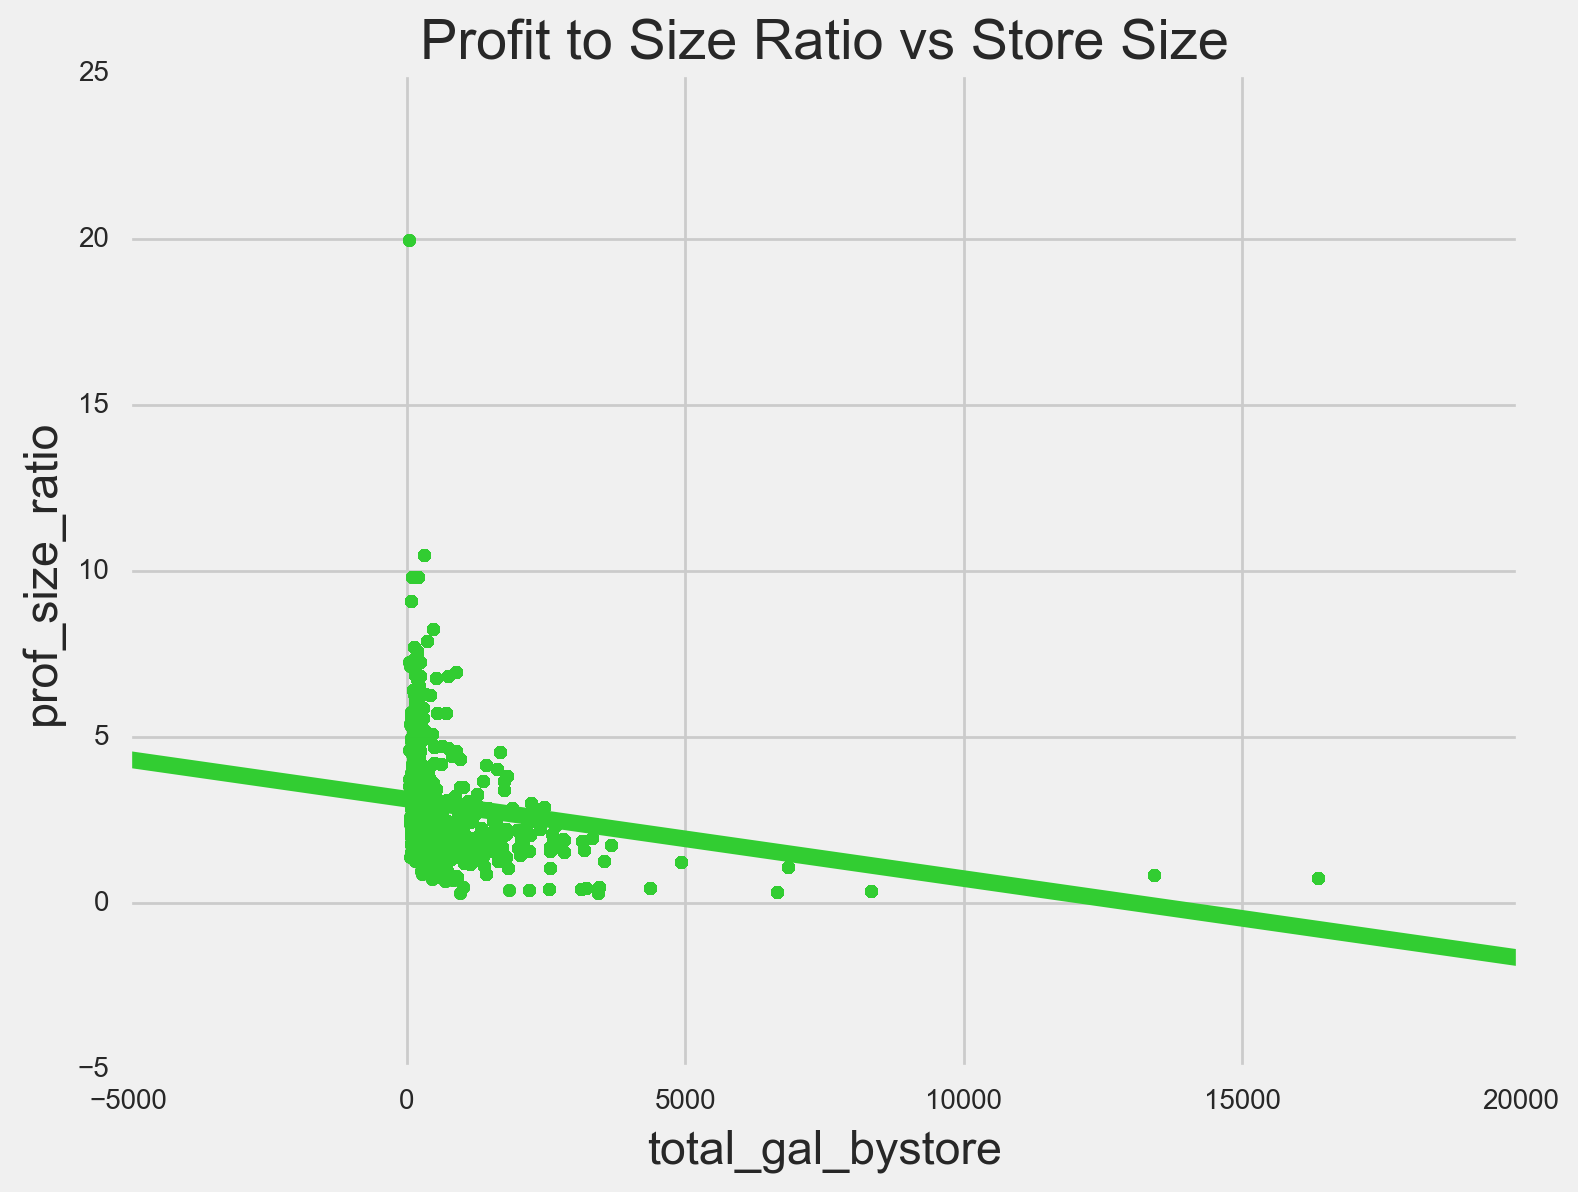

In [58]:
## Plotting the relationship between store size and profit to size ratio

profit_to_size_ratio = iowa2015a.prof_size_ratio
store_size = iowa2015a.total_gal_bystore

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(store_size, profit_to_size_ratio, fit_reg=True, color='limegreen', ax=ax)

ax.set_title( 'Profit to Size Ratio vs Store Size')
plt.show()

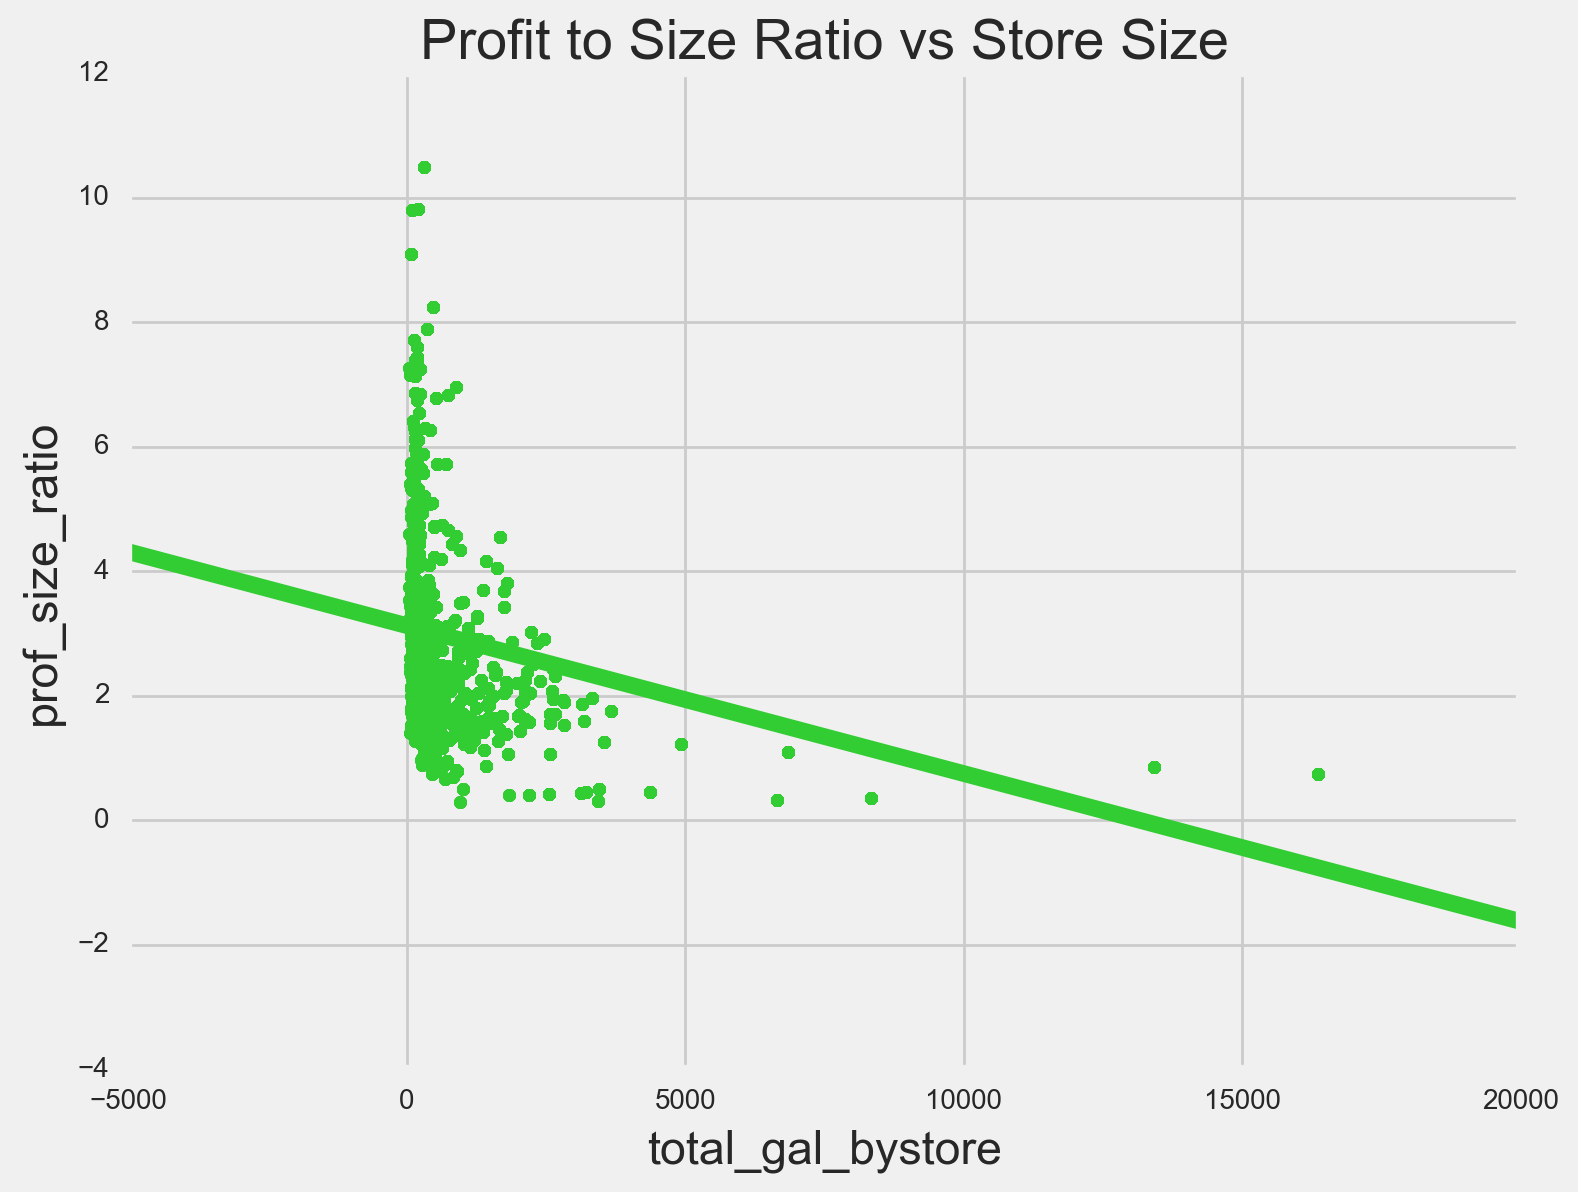

In [61]:
## I am going to remove the one largest prof_size_ratio outlier (the largest outlier for either variable)
## and re-examine the trend.

iowa2015a = iowa2015a[iowa2015a.prof_size_ratio < 15]

profit_to_size_ratio = iowa2015a.prof_size_ratio
store_size = iowa2015a.total_gal_bystore

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

ax = sns.regplot(store_size, profit_to_size_ratio, fit_reg=True, color='limegreen', ax=ax)

ax.set_title( 'Profit to Size Ratio vs Store Size')
plt.show()

After removing the largest outlier in this dataset for either of these two variables, the scatterplot shows that
as the size of the store increases, the profit to size ratio decreases. 

### 5.5 Create a broader category for liquor type.

Liquor types are pretty granular in this dataset. Create a column that categorizes these types into a smaller amount of categories. The categories you decide on are up to you.

In [62]:
## Applying code from: http://stackoverflow.com/questions/30649713/python-pandas-dataframe-conditional-if-elif-else
## The code below searches the category name of each entry for specific words or phrases, and then segments them into 
## more simple groups in a new column called "broad_liq_type." The final line of code prints a table that shows the
## number of entries per category. This new column classifies the entries into only 14 different categories, leaving 
## only slightly more than 3000 entries left in an "OTHER" category.

iowa['broad_liq_type'] = np.where(iowa['category_name'].str.contains('WHISK') , "Whiskey",
           np.where(iowa['category_name'].str.contains('VODKA'), "Vodka",
           np.where(iowa['category_name'].str.contains('RUM'), "Rum",  
           np.where(iowa['category_name'].str.contains('GINS'), "Gin",
           np.where(iowa['category_name'].str.contains('SCOTCH'), "Scotch",
           np.where(iowa['category_name'].str.contains('TEQUILA'), "Tequila",
           np.where(iowa['category_name'].str.contains('BRANDIES'), "Brandy",           
           np.where(iowa['category_name'].str.contains('COCKTAILS'), "Cocktails",
           np.where(iowa['category_name'].str.contains('TRIPLE SEC'), "Triple Sec",
           np.where(iowa['category_name'].str.contains('LIQUEUR'), "Liqueur",
           np.where(iowa['category_name'].str.contains('CREME'), "Creme Liqueurs",
           np.where(iowa['category_name'].str.contains('AMERICAN ALCOHOL'), "Other American Alcohol",
           np.where(iowa['category_name'].str.contains('DECANTERS & SPECIALTY PACKAGES'), "Decanters and Specialty Packages",
           np.where(iowa['category_name'].str.contains('SCHNAPPS'), "Schnapps", "OTHER" ))))))))))))))
iowa.groupby(['broad_liq_type']).count()['category'].reset_index()

,broad_liq_type,category
0,Brandy,13631
1,Cocktails,6581
2,Creme Liqueurs,700
3,Decanters and Specialty Packages,1054
4,Gin,9242
5,Liqueur,16755
6,OTHER,3111
7,Other American Alcohol,547
8,Rum,30036
9,Schnapps,12923


In [63]:
iowa.head(1)

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,...,liters_sold,gallons_sold,year,month,month_sales_dummy,profit_per_bottle,profit_per_item,total_profit_bystore,total_sales_bystore,broad_liq_type
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,9.0,2.38,2015,11,12.0,2.25,27.0,1730.02,11533.32,Brandy


### 5.6 Do relationships exist between the broader liquor type and profit?

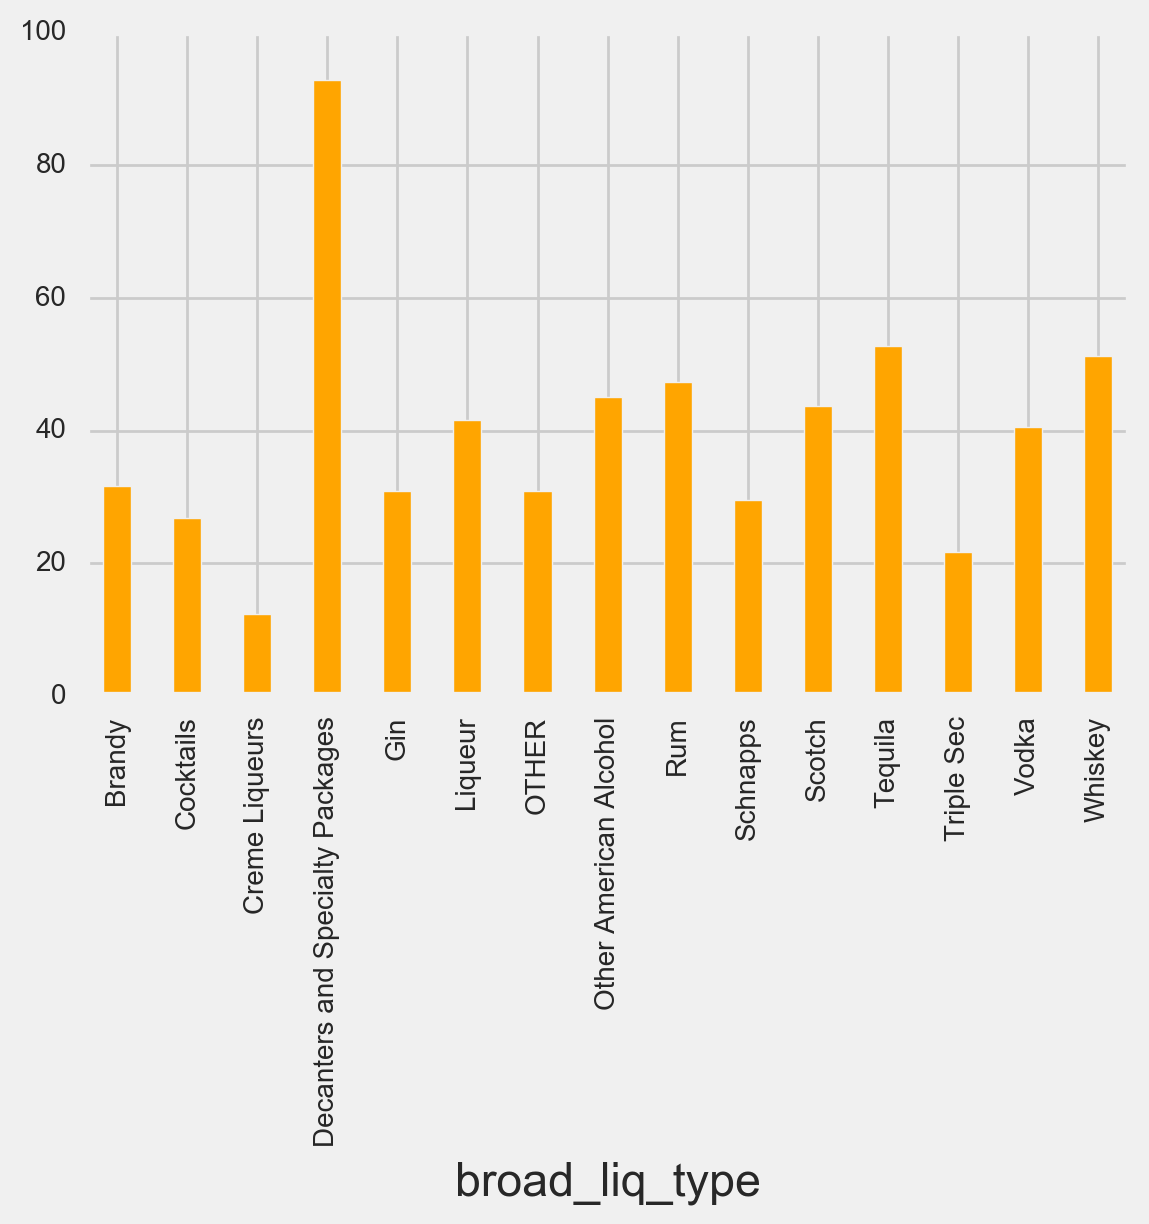

In [64]:
iowa.groupby(['broad_liq_type'])['profit_per_item'].mean().plot(kind="bar", color=["orange"], width=0.4)
plt.show()

It seems as though decanters and other specialty packages have the highest mean profit per item of all categories in the dataset. For liquor types, tequila, whiskey, and rum sales bring in the highest profit, while creme liqueurs and triple sec yield the lowest profits. 


### 5.7 Are there any noticeable relationships between liquor brand and sales? Profit?

In [65]:
## Given that there are so many different brand types in the data set, I am going to do two
## case studies on the relationship between liquor brand and sales and profit for two specific
## categories of liquor. Looking at specific types of liquor allows us to cancel out the 
## confounding influence of liquor TYPE on the relationship between brand and sales or profit,
## which would be a problem if we tried to examine the relationship between brand and sales 
## or profit for the entire dataset.

## First step is to create two new dataframes, one that includes only tequila products 
## and one that includes only triple sec products. These will be my two case studies.


iowa_tequila = iowa[iowa.broad_liq_type == 'Tequila']
iowa_triple = iowa[iowa.broad_liq_type == 'Triple Sec']

In [66]:
## Using the same code that I used to make new liquor categories to classify different brands of tequila.

iowa_tequila['tequila_brand'] = np.where(iowa_tequila['item_description'].str.contains('1800') , "1800",
           np.where(iowa_tequila['item_description'].str.contains('Don Julio'), "Don Julio",
           np.where(iowa_tequila['item_description'].str.contains('Cuervo'), "Jose Cuervo",  
           np.where(iowa_tequila['item_description'].str.contains('Patron'), "Patron",
           np.where(iowa_tequila['item_description'].str.contains('DeLeon'), "De Leon",
           np.where(iowa_tequila['item_description'].str.contains('Jimador'), "El Jimador",
           np.where(iowa_tequila['item_description'].str.contains('Herradura'), "Herradura",           
           np.where(iowa_tequila['item_description'].str.contains('Sauza'), "Sauza",
           np.where(iowa_tequila['item_description'].str.contains('Milagro'), "Milagro",
           np.where(iowa_tequila['item_description'].str.contains('Espolon'), "Espolon",
           np.where(iowa_tequila['item_description'].str.contains('Avion'), "Avion",
           np.where(iowa_tequila['item_description'].str.contains('Cabo Wabo'), "Cabo Wabo",
           np.where(iowa_tequila['item_description'].str.contains('Peligroso'), "Peligroso",
           np.where(iowa_tequila['item_description'].str.contains('Tres Agaves'), "Tres Agaves",
           np.where(iowa_tequila['item_description'].str.contains('Olmeca'), "Olmeca",
           np.where(iowa_tequila['item_description'].str.contains('Tortilla'), "Tortilla",
           np.where(iowa_tequila['item_description'].str.contains('Corralejo'), "Corralejo",
           np.where(iowa_tequila['item_description'].str.contains('Cazadores'), "Cazadores",
           np.where(iowa_tequila['item_description'].str.contains('Casamigos'), "Casamigos",
           np.where(iowa_tequila['item_description'].str.contains('Casa Noble'), "Casa Noble",
           np.where(iowa_tequila['item_description'].str.contains('Hornitos'), "Hornitos", "OTHER" )))))))))))))))))))))
iowa_tequila.groupby(['tequila_brand']).count()['item_description'].reset_index()

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tequila_brand,item_description
0,1800,664
1,Avion,173
2,Cabo Wabo,182
3,Casa Noble,37
4,Casamigos,36
5,Cazadores,127
6,Corralejo,120
7,De Leon,40
8,Don Julio,407
9,El Jimador,361


In [67]:
iowa_tequila.head(1)

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,...,gallons_sold,year,month,month_sales_dummy,profit_per_bottle,profit_per_item,total_profit_bystore,total_sales_bystore,broad_liq_type,tequila_brand
42,2015-05-13,3717,SUMNER,9.0,Bremer,1022100.0,TEQUILA,395,89197,Jose Cuervo Especial Reposado Tequila,...,0.53,2015,5,12.0,6.25,12.5,1730.02,11533.32,Tequila,Jose Cuervo


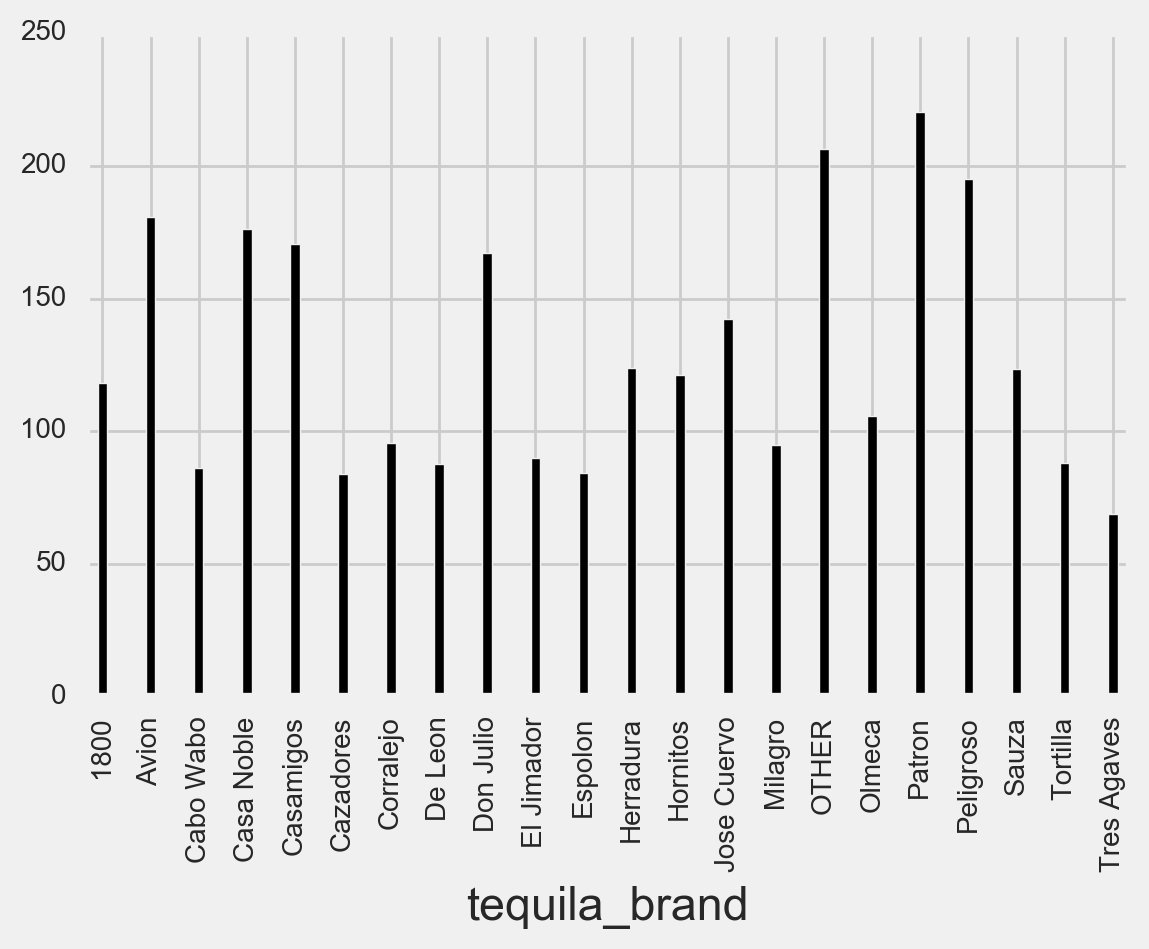

In [68]:
## Now the dataset has a column that notes 20 different brands of tequila, and one "other"
## brand that encompasses those products that don't fall within the other 20 brands.

## Creating another bar graph to see which brands bring in the most sales

iowa_tequila.groupby(['tequila_brand'])['sale_dollars'].mean().plot(kind="bar", color=["k"], width=0.2)
plt.show()

This graph shows that Patron, Peligroso, Avion, Casa Noble, and those brands in the 'other' category yield the highest average sales. Tres Agaves yields the lowest sales among tequila brands. 

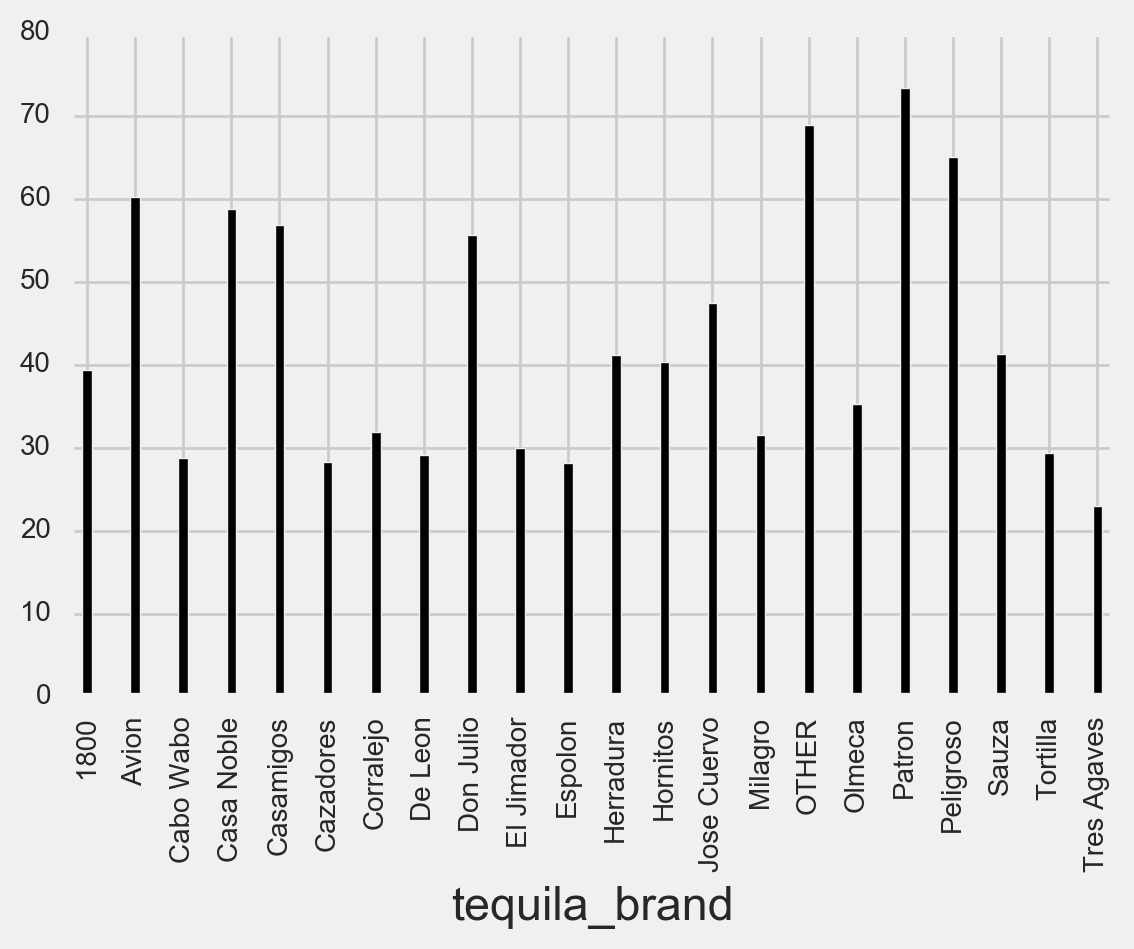

In [69]:
## Let's take a look at the relationship between the brands and profits. 

iowa_tequila.groupby(['tequila_brand'])['profit_per_item'].mean().plot(kind="bar", color=["k"], width=0.2)
plt.show()

As you can see, the relationship between profit and brand is very similar to the relationship between sales and brand. I think that the more interesting question with tequila is how does profit relate to how long the tequila has been aged. I'm going to try to create categories for blanco, reposado, and anejo tequilas and then look at the relationships. 

In [70]:
## Using the same code that I used to make new liquor categories to classify different ages of tequila.

iowa_tequila['tequila_age'] = np.where(iowa_tequila['item_description'].str.contains('Anejo') , "Anejo",
           np.where(iowa_tequila['item_description'].str.contains('Reposado'), "Reposado",
           np.where(iowa_tequila['item_description'].str.contains('Blanco'), "Blanco", "Not Specified" )))
iowa_tequila.groupby(['tequila_age']).count()['item_description'].reset_index()

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,tequila_age,item_description
0,Anejo,448
1,Blanco,469
2,Not Specified,5886
3,Reposado,4438


In [71]:
## For the purposes of this analysis, I am going to create a new dataframe that only includes 
## tequilas that are specified as anejo, blanco, or reposado, removing the "not specified" group.

iowa_tequila_clean = iowa_tequila[(iowa_tequila.tequila_age == 'Blanco') | (iowa_tequila.tequila_age == 'Reposado') | (iowa_tequila.tequila_age == 'Anejo')]

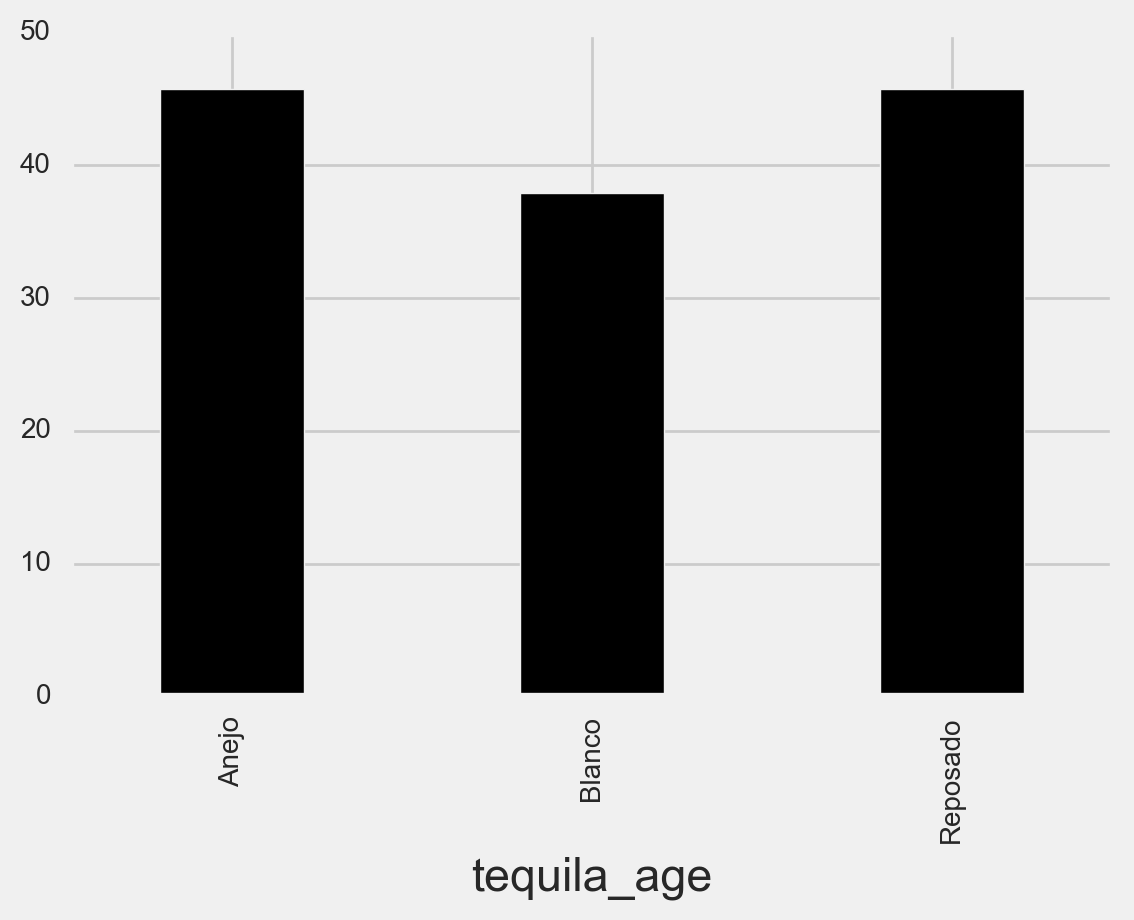

In [72]:
iowa_tequila_clean.groupby(['tequila_age'])['profit_per_item'].mean().plot(kind="bar", color=["k"], width=0.4)
plt.show()

Interestingly, this graph shows that mean profit per item sold is roughly equal for those tequilas classified as reposado and anejo, while it is much lower for blanco tequilas. Since many of the item description names did not explicitly state which category of tequila each product was in, this new dataframe has a much smaller sample, so results may not be highly generalizeable. 

In [73]:
## Now, I'll do a similar analysis for triple sec. 
## How is brand name related to sales and profits?
## First step is to create a brand column for the different triple sec brands.

iowa_triple['triple_brand'] = np.where(iowa_triple['item_description'].str.contains('Bauchant') , "Bauchant",
           np.where(iowa_triple['item_description'].str.contains('Dekuyper'), "Dekuyper",
           np.where(iowa_triple['item_description'].str.contains('Juarez'), "Juarez",  
           np.where(iowa_triple['item_description'].str.contains('Tortilla'), "Tortilla",
           np.where(iowa_triple['item_description'].str.contains('Ice Hole'), "Ice Hole",
           np.where(iowa_triple['item_description'].str.contains('Paramount'), "Paramount",
           np.where(iowa_triple['item_description'].str.contains('La Prima'), "La Prima",           
           np.where(iowa_triple['item_description'].str.contains('Montezuma'), "Montezuma","OTHER" ))))))))
iowa_triple.groupby(['triple_brand']).count()['item_description'].reset_index()

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,triple_brand,item_description
0,Bauchant,1
1,Dekuyper,291
2,Ice Hole,2
3,Juarez,377
4,La Prima,29
5,Montezuma,86
6,Paramount,350
7,Tortilla,46


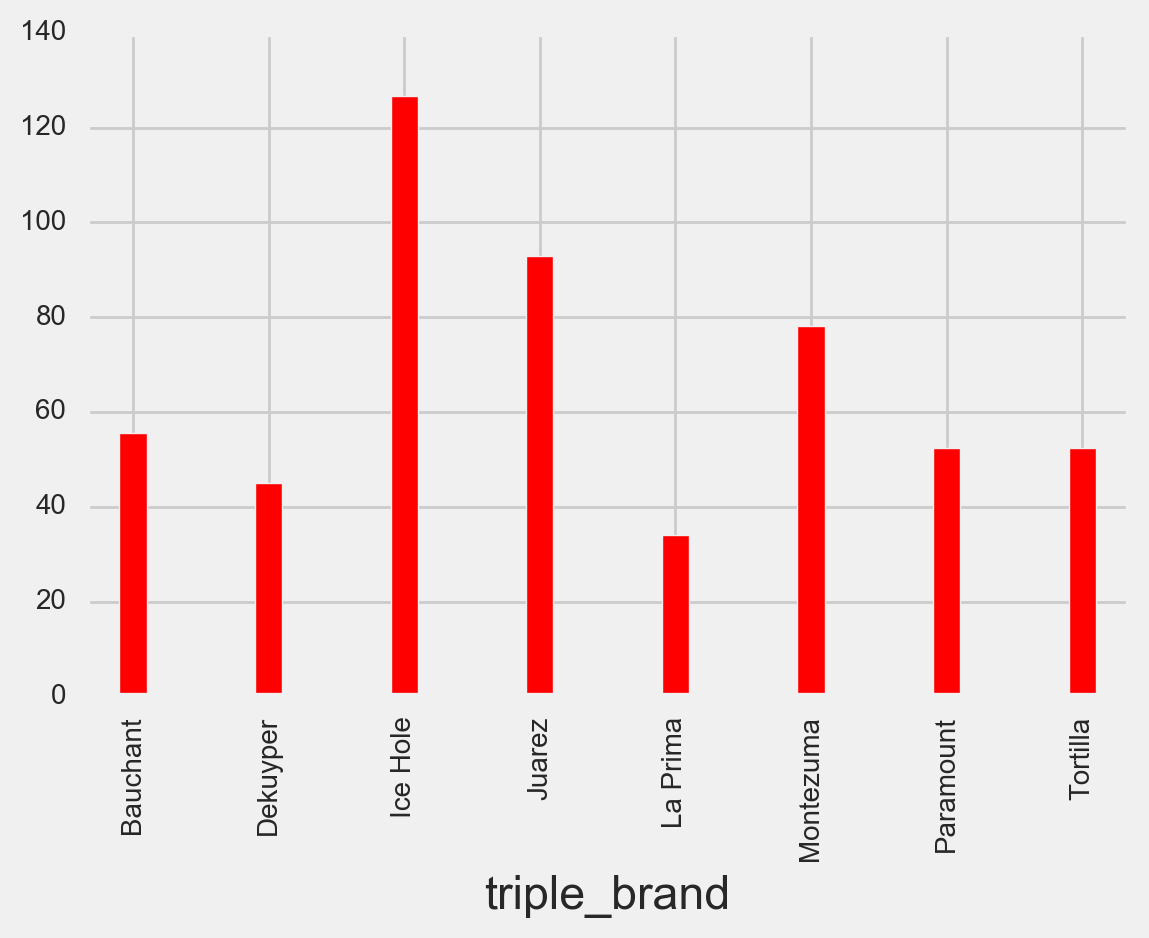

In [74]:
## Here is a bar graph showing average sale dollars by each brand of triple sec.

iowa_triple.groupby(['triple_brand'])['sale_dollars'].mean().plot(kind="bar", color=["r"], width=0.2)
plt.show()

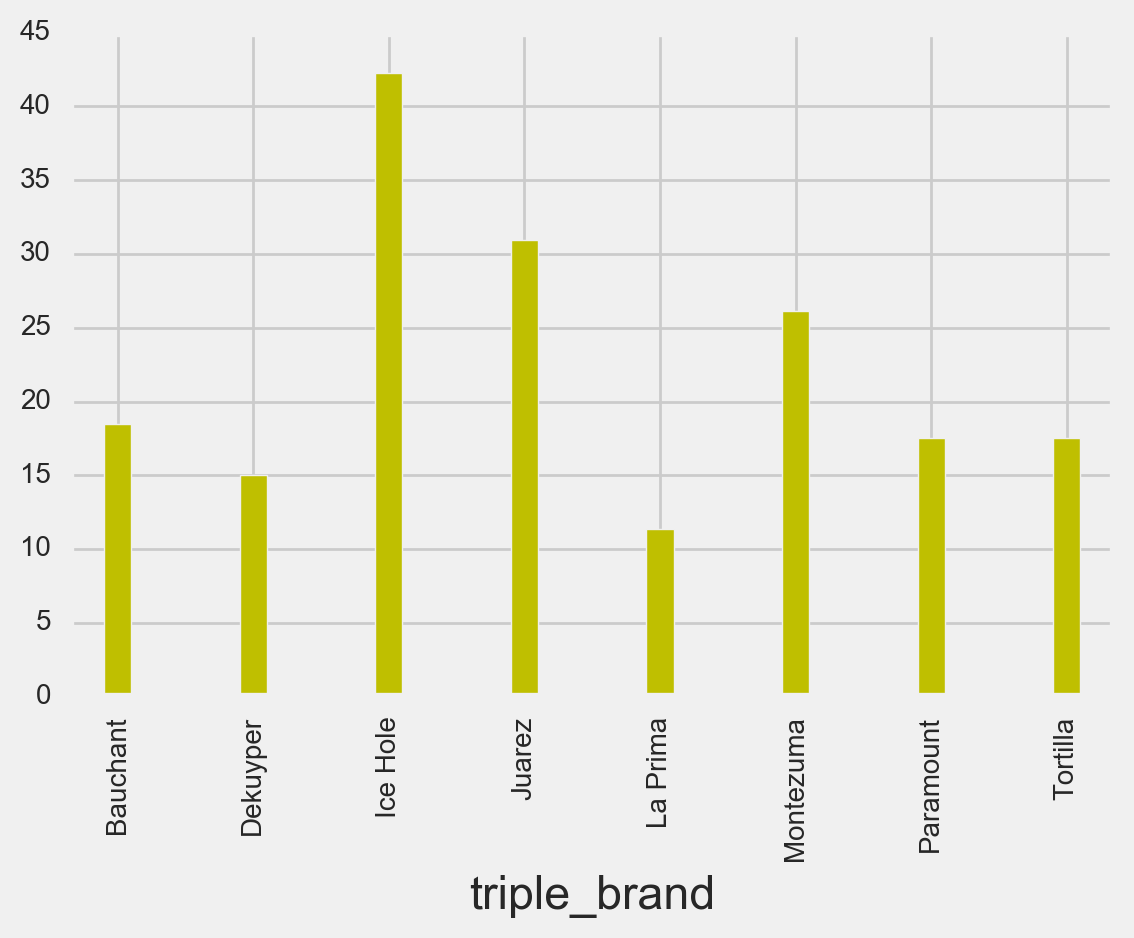

In [75]:
## Here is a bar graph showing average profit per item, for each brand of triple sec.

iowa_triple.groupby(['triple_brand'])['profit_per_item'].mean().plot(kind="bar", color=["y"], width=0.2)
plt.show()

As you can see, above the two bar graphs closely mirror each other. Sales and profits definitely do differ by brand of triple sec. La prima yields the lowest sales AND profits, while Ice Hole and Juarez brand triple secs yield the highest. 

In [76]:
## Below is one way of looking at mean sales by item description for all liquor types, but again, this doesn't 
## really tell us about the relationship between brand only, since certain liquor types yield higher sales than 
## others, regardless of brand. More case studies would be necessary to see how brand is related to sales and profit
## within each type of liquor. There are other confounding factors that could be controlled
## for as well, including size of the bottle.

mean_sale_bybrand = iowa.groupby(['item_description']).mean()[['sale_dollars']].reset_index()
mean_sale_bybrand.sort(['sale_dollars'], ascending=0, inplace=True)
print mean_sale_bybrand

                                       item_description  sale_dollars
1327                                Member's Mark Vodka   4668.060000
1101                       Jim Beam Operation Homefront   4252.114286
1326                           Member's Mark Spiced Rum   3913.920000
1325                                        Medea Vodka   3221.640000
69                                Absolut w/Ginger Beer   2399.200000
1265                                 Macallan FO 17year   2163.960000
599                                  Crystal Malt 200ml   1721.160000
1257                                 Luxardo Maraschino   1260.000000
908                               Gran Centenario Anejo   1103.040000
104                                  Appleton Estate Vx   1071.000000
1301                             Martell Cordon Bleu 12   1048.200000
909                            Gran Centenario Reposado   1010.640000
1528                            Pearl Wedding Cake Vodk    989.520000
961          Henness

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


### 5.8 The tax board wants to design a tax or taxes that affect larger stores more than smaller "mom and pop" stores.

Based on your investigations into the data, come up with a way you could design a tax that achieves this goal **without explicitly taxing stores based on size or county critera.** The liqour board does not want to obviously punish larger stores or speific counties for fear of backlash, but is willing to tax hard alcohol more than beer, for example.

Feel free to do more EDA if it helps.

Your report should describe whether such a tax is possible or not, and the specifics of what the tax will target/do.

In [78]:
## Creating a store size (total_gal_bystore) column in the full (2015 and 2016 dataset)

iowa['total_gal_bystore'] = iowa['gallons_sold'].groupby(iowa['store_number']).transform('sum')

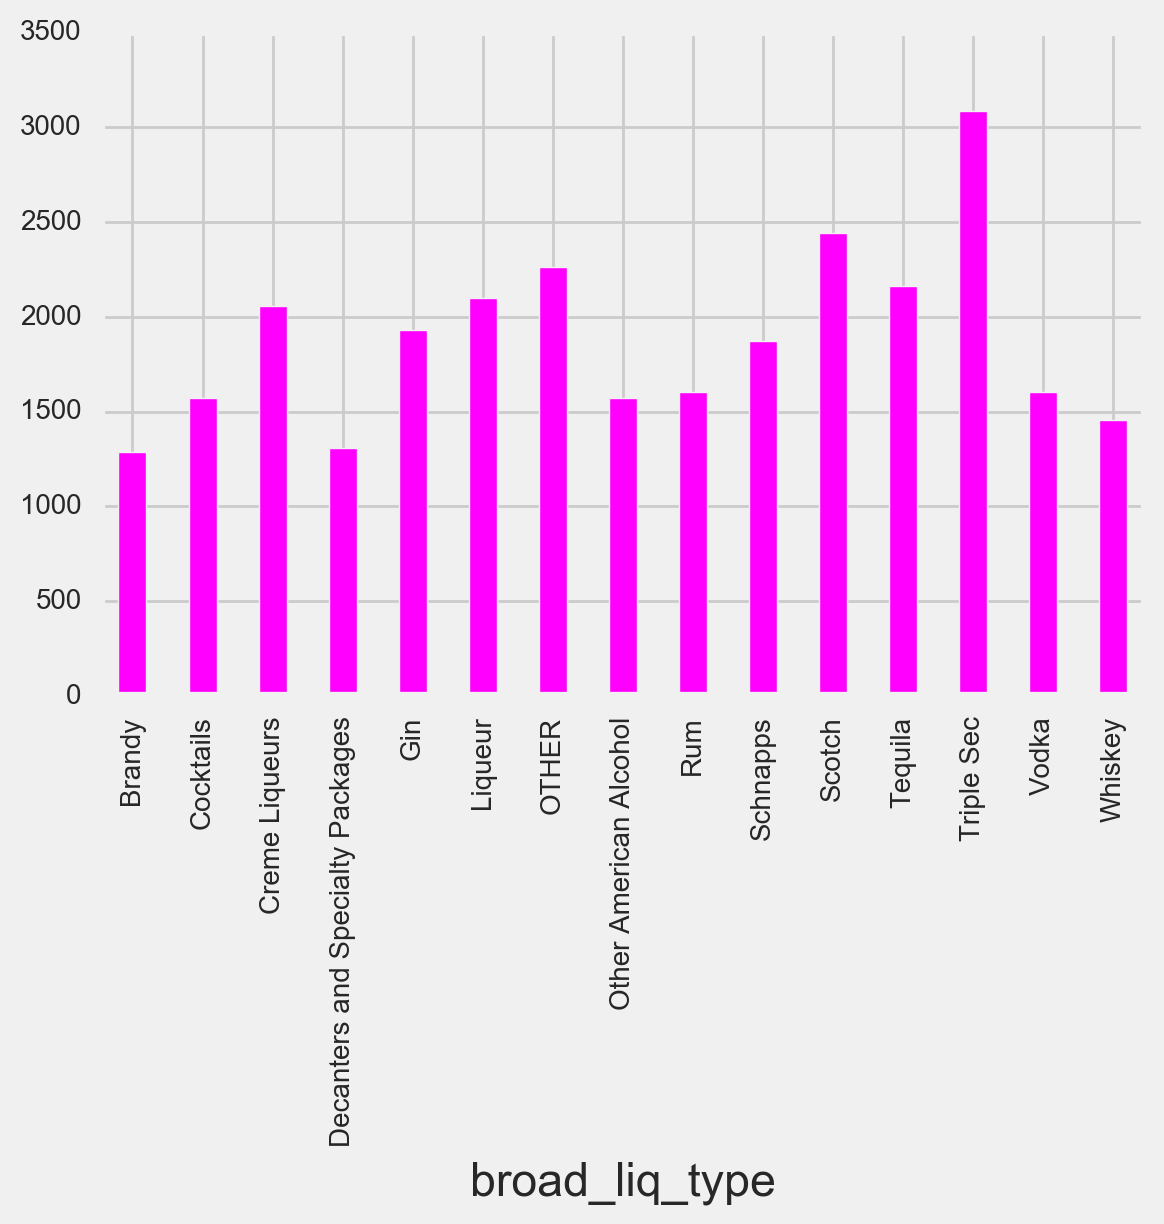

In [79]:
iowa.groupby(['broad_liq_type'])['total_gal_bystore'].mean().plot(kind="bar", color=["magenta"], width=0.4)
plt.show()

A tax on large stores is possible if we can get a sense of what large stores order and sell more of than small mom and pop stores. This graph shows that the average store size is largest in stores that have Triple Sec and Scotch. Hence, I will propose a tax on orders of Triple Sec and Scotch. This will disproportionately affect the largest stores but will be more harmless to smaller mom and pop stores. 


## 6. Case 2 = Market research for new store locations 

A liquor store owner in Iowa is looking to open a store in a new location and has hired you as a consultant to investigate the market data for potential new locations. The business owner is interested in what you can discover from the data that will help him evaluate a good location for a new storefront.

---

### 6.1 Create columns for Q1 2015 sales and Q1 2016 sales.

The owner is not just interested in what locations are currently selling well, but also which areas are showing the most promising sales growth from 2015 to 2016. 

For yearly changes we will focus on the changes from Q1 2015 to Q1 2016 specifically (avoiding effects of season changes).

Note: Q1 is months: January, February, and March.


In [80]:
## Creating a new column for quarter. 
## Adapting code from here: http://stackoverflow.com/questions/25146121/extracting-just-month-and-year-from-pandas-datetime-column-python
## This code sets a new column name 'quarter' equal to the quarter based on 
## the pandas/numpy 'datetime' variable.


iowa['quarter'] = iowa['date'].dt.quarter
iowa.head()

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,...,year,month,month_sales_dummy,profit_per_bottle,profit_per_item,total_profit_bystore,total_sales_bystore,broad_liq_type,total_gal_bystore,quarter
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,2015,11,12.0,2.25,27.00,1730.02,11533.32,Brandy,230.4,4
1,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,2015,6,12.0,2.25,9.00,1730.02,11533.32,Brandy,230.4,2
2,2015-01-21,3717,SUMNER,9.0,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,Kinky Liqueur,...,2015,1,12.0,5.00,10.00,1730.02,11533.32,Liqueur,230.4,1
3,2015-11-11,3717,SUMNER,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,...,2015,11,12.0,3.32,6.64,1730.02,11533.32,Whiskey,230.4,4
4,2015-01-07,3717,SUMNER,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,Maker's Mark,...,2015,1,12.0,8.40,8.40,1730.02,11533.32,Whiskey,230.4,1


In [81]:
## I couldn't figure out how to add a column for Q1 sales into the existing dataframe, so I am
## creating a new dataframe with a column for Q1 sales in 2015 and 2016

## First step is to create a new dataframe with a row for Q1 sales in 2015

Q1_sales = iowa[iowa['quarter']==1].groupby(['store_number','year'])['sale_dollars'].agg(np.sum).reset_index()
Q1_sales = Q1_sales.rename(columns = {'sale_dollars': 'Q1_sales'})
Q1_sales_2015 = Q1_sales[Q1_sales['year']==2015].groupby(['store_number'])['Q1_sales'].agg(np.sum).reset_index()
Q1_sales_2015 = Q1_sales_2015.rename(columns = {'Q1_sales': 'Q1_sales_2015'})
Q1_sales_2015 = iowa.merge(Q1_sales_2015, on=['store_number'], how='left')

## Then I'll create a data frame with a row for Q1 sales in 2016, and merge the two.

Q1_sales_both = Q1_sales[Q1_sales['year']==2016].groupby(['store_number'])['Q1_sales'].agg(np.sum).reset_index()
Q1_sales_both = Q1_sales_both.rename(columns = {'Q1_sales': 'Q1_sales_2016'})
Q1_sales_both = Q1_sales_2015.merge(Q1_sales_both, on=['store_number'], how='left')

In [82]:
Q1_sales_both.head()

## This dataframe now shows both new columns that we want.

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,...,month_sales_dummy,profit_per_bottle,profit_per_item,total_profit_bystore,total_sales_bystore,broad_liq_type,total_gal_bystore,quarter,Q1_sales_2015,Q1_sales_2016
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,12.0,2.25,27.00,1730.02,11533.32,Brandy,230.4,4,1583.13,2510.46
1,2015-06-10,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,12.0,2.25,9.00,1730.02,11533.32,Brandy,230.4,2,1583.13,2510.46
2,2015-01-21,3717,SUMNER,9.0,Bremer,1081900.0,MISC. AMERICAN CORDIALS & LIQUEURS,322,75211,Kinky Liqueur,...,12.0,5.00,10.00,1730.02,11533.32,Liqueur,230.4,1,1583.13,2510.46
3,2015-11-11,3717,SUMNER,9.0,Bremer,1012100.0,CANADIAN WHISKIES,115,11777,Black Velvet,...,12.0,3.32,6.64,1730.02,11533.32,Whiskey,230.4,4,1583.13,2510.46
4,2015-01-07,3717,SUMNER,9.0,Bremer,1011200.0,STRAIGHT BOURBON WHISKIES,65,19476,Maker's Mark,...,12.0,8.40,8.40,1730.02,11533.32,Whiskey,230.4,1,1583.13,2510.46


### 6.2 Decide on a metric for performance that combines Q1 2016 sales as well as growth in sales from Q1 2015.

Again, the owner wants to know that his store will be in a good position to sell a large amount of liquor now, but also have his store be more likely to grow and sell even more going forward. 

In particular, he is worried about opening a store in an area that is showing a decline in liquor sales between Q1 2015 and Q1 2016.

In [83]:
## I am going to create a new column for growth rate between Q1 2015 and Q1 2016. 

Q1_sales_both['growth_rate'] = Q1_sales_both['Q1_sales_2016']/Q1_sales_both['Q1_sales_2015']

In [84]:
## Now I am going to scale Q1 2016 sales by the growth rate (by store) between 2015 and 2016.
## This new column will be called "growth_metric"

Q1_sales_both['growth_metric'] = Q1_sales_both['Q1_sales_2016']*Q1_sales_both['growth_rate']

In [85]:
## Now, let's see the areas where stores have the highest growth metric

mean_growth_bycounty = Q1_sales_both.groupby(['county']).mean()[['growth_metric']].reset_index()
mean_growth_bycounty.sort(['growth_metric'], ascending=0, inplace=True)
print mean_growth_bycounty

           county  growth_metric
23       Crawford   50520.371133
51        Johnson   40489.547352
76           Polk   38411.197832
24         Dallas   31228.736102
55            Lee   25095.203625
77  Pottawattamie   22576.884163
30        Dubuque   22503.508339
96       Woodbury   20575.735831
22        Clinton   20316.135882
81          Scott   20244.259254
84          Story   18241.470263
15          Cedar   17874.925364
56           Linn   16831.981127
16    Cerro Gordo   16102.535702
63       Marshall   16092.416034
6      Black Hawk   14337.087956
28     Des Moines   14314.930059
93        Webster   14235.230526
33          Floyd   13765.278055
32        Fayette   13735.991869
74       Plymouth   12895.788359
58          Lucas   12665.702858
54        Kossuth   12459.593715
20           Clay   12080.960380
94      Winnebago   12065.337791
3       Appanoose   12042.258041
85           Tama   12026.561205
14           Cass   11918.504309
8          Bremer   11578.685488
41        

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


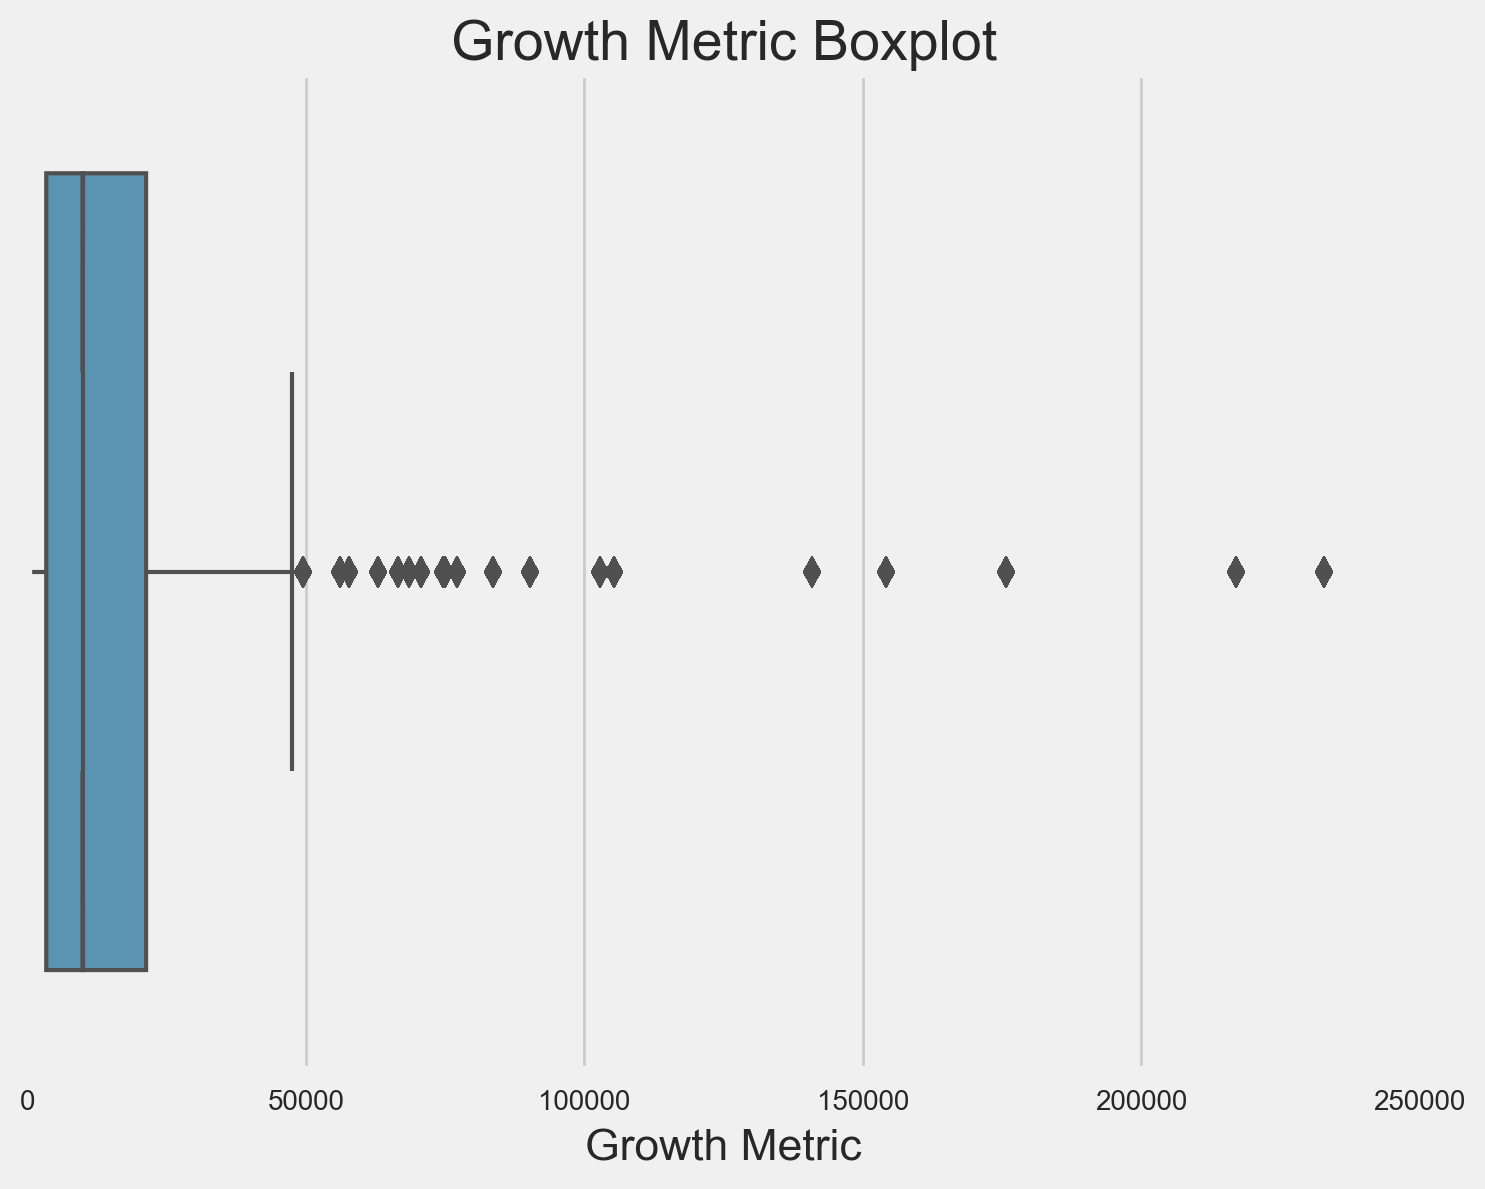

In [86]:
## Crawford county has the highest growth metric, but let me just double check that the results are not being 
## skewed by outliers. 

## Adapted the following code from Mario's full analysis jupyter notebook. 
## It uses seaborn to create a boxplot.

fig = plt.figure(figsize=(8,6))
ax = fig.gca()

sns.boxplot(Q1_sales_both.growth_metric, orient='h',
            fliersize=8, linewidth=1.5, notch=True, 
            saturation=0.5, ax=ax)

ax.set_xlabel('Growth Metric', fontsize=16)
ax.set_title('Growth Metric Boxplot', fontsize=20)

plt.show()

In [87]:
## There do seem to be some outliers. I am going to remove these and then check which counties
## might have the highest growth metric afterwards.

Q1_sales_both_NO = Q1_sales_both[Q1_sales_both.growth_metric < 100000]

In [88]:
mean_growth_bycounty_NO = Q1_sales_both_NO.groupby(['county']).mean()[['growth_metric']].reset_index()
mean_growth_bycounty_NO.sort(['growth_metric'], ascending=0, inplace=True)
print mean_growth_bycounty_NO

           county  growth_metric
22       Crawford   50520.371133
23         Dallas   31228.736102
53            Lee   25095.203625
29        Dubuque   22503.508339
49        Johnson   20985.474157
21        Clinton   20316.135882
82          Story   18241.470263
79          Scott   18112.077809
14          Cedar   17874.925364
75  Pottawattamie   17776.602520
54           Linn   16831.981127
94       Woodbury   16353.854310
15    Cerro Gordo   16102.535702
61       Marshall   16092.416034
74           Polk   14476.897979
5      Black Hawk   14337.087956
27     Des Moines   14314.930059
91        Webster   14235.230526
32          Floyd   13765.278055
31        Fayette   13735.991869
72       Plymouth   12895.788359
56          Lucas   12665.702858
52        Kossuth   12459.593715
19           Clay   12080.960380
92      Winnebago   12065.337791
3       Appanoose   12042.258041
83           Tama   12026.561205
13           Cass   11918.504309
7          Bremer   11578.685488
39        

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [89]:
## Even after removing large outliers, Crawford county still proves to have the best growth
## metric of all of the counties in Iowa.

In [90]:
Q1_sales_both_NO.head(1)

,date,store_number,city,county_number,county,category,category_name,vendor_number,item_number,item_description,...,profit_per_item,total_profit_bystore,total_sales_bystore,broad_liq_type,total_gal_bystore,quarter,Q1_sales_2015,Q1_sales_2016,growth_rate,growth_metric
0,2015-11-04,3717,SUMNER,9.0,Bremer,1051100.0,APRICOT BRANDIES,55,54436,Mr. Boston Apricot Brandy,...,27.0,1730.02,11533.32,Brandy,230.4,4,1583.13,2510.46,1.585757,3980.980344


### 6.3 Recommend a location based on your metric.

The owner asks you to make a recommendation for a new store location. Explain why you recommended this area.

I recommend opening a new sore in Crawford county. When considering both average Q1 sales and growth between Q1 2015 and Q1 2016, Crawford county far outperforms other counties in Iowa. 

To answer this question I created a metric that scales Q1 2016 sales by the average growth rate experienced by stores in each county. For example, if stores in County A had mean Q1 2016 sales of 100 dollars and a mean growth rate (between Q1 2015 and Q1 2016) of 150 percent, then County A's mean growth metric would be 150. If stores in County B had mean Q1 2016 sales of 500 dollars and a mean growth rate of 20 percent, then County B's mean growth metric would be 100. Crawford county leads the way among Iowa counties, with an average growth metric of 50,520. The next closest county is Dallas, with an average growth metric of 31,228.

### 6.4 Recommend a location based also on a restricted inventory type.

Your employer has now decided he wants his store to focus on one type of liquor only. He askes you:

1. What would be the best type of liquor to sell to maximize profit?
2. Should the recommended location change if he is only selling one type of liquor?

In [91]:
## Let's see what products yield the highest profit
mean_profit_bytype = iowa.groupby(['broad_liq_type']).mean()[['profit_per_item']].reset_index()
mean_profit_bytype.sort(['profit_per_item'], ascending=0, inplace=True)
print mean_profit_bytype

                      broad_liq_type  profit_per_item
3   Decanters and Specialty Packages        92.802163
11                           Tequila        52.783814
14                           Whiskey        51.180327
8                                Rum        47.278344
7             Other American Alcohol        45.101536
10                            Scotch        43.648241
5                            Liqueur        41.626682
13                             Vodka        40.513156
0                             Brandy        31.654617
6                              OTHER        30.935127
4                                Gin        30.930452
9                           Schnapps        29.524946
1                          Cocktails        26.818344
12                        Triple Sec        21.711988
2                     Creme Liqueurs        12.414729


/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


We see in the above list, that average profit is highest for Decanters and Specialty Packages.
Tequila and whiskey are the next highest in terms of average profit per item sold. Since decanters are not a liquor, I will explore the data to see what county would be best to open up a shop in if the new storeowner wants to exclusively sell tequila or whiskey, the two most promising liquor types.

In [92]:
## Creating dataframes for transactions on whiskey only and for transactions on tequila only.
iowa_whiskey = Q1_sales_both_NO[Q1_sales_both_NO.broad_liq_type == 'Whiskey']

iowa_tequila = Q1_sales_both_NO[Q1_sales_both_NO.broad_liq_type == 'Tequila']

In [93]:
## Printing list of highest average growth metric by county for tequila sales. 

mean_teq_gm = iowa_tequila.groupby(['county']).mean()[['growth_metric']].reset_index()
mean_teq_gm.sort(['growth_metric'], ascending=0, inplace=True)
print mean_teq_gm

           county  growth_metric
22       Crawford   60587.099367
23         Dallas   36112.643747
53            Lee   35832.605864
29        Dubuque   31060.253234
21        Clinton   28868.161567
49        Johnson   24276.054367
75  Pottawattamie   20646.124955
79          Scott   20638.210181
54           Linn   20160.878077
82          Story   19662.310897
15    Cerro Gordo   18734.203649
61       Marshall   17784.076043
93       Woodbury   17708.384732
3       Appanoose   16859.170934
14          Cedar   16248.950109
32          Floyd   15914.881858
74           Polk   15707.006924
90        Webster   15428.499563
72       Plymouth   15262.895396
13           Cass   14665.228224
5      Black Hawk   14413.950348
31        Fayette   14025.477879
27     Des Moines   13991.861059
83           Tama   13720.777950
94          Worth   13711.714272
7          Bremer   13697.102246
45           Iowa   13330.193082
19           Clay   12862.622890
56          Lucas   12665.702858
92     Win

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


In [94]:
## Printing list of highest average growth metric by county for whiskey sales. 

mean_whisk_gm = iowa_whiskey.groupby(['county']).mean()[['growth_metric']].reset_index()
mean_whisk_gm.sort(['growth_metric'], ascending=0, inplace=True)
print mean_whisk_gm

           county  growth_metric
22       Crawford   43865.529125
23         Dallas   29672.583616
53            Lee   22860.204052
29        Dubuque   21009.108046
21        Clinton   20346.581014
49        Johnson   19939.208318
75  Pottawattamie   17403.954798
82          Story   17275.723639
14          Cedar   17097.194888
79          Scott   17031.805206
54           Linn   16707.596192
15    Cerro Gordo   15311.271873
94       Woodbury   15095.044061
27     Des Moines   14692.912307
61       Marshall   14612.155421
5      Black Hawk   14223.120175
91        Webster   14138.897325
32          Floyd   14059.075197
31        Fayette   13892.886450
74           Polk   13800.335070
56          Lucas   12665.702858
52        Kossuth   12300.024162
83           Tama   12024.145055
92      Winnebago   11944.296489
19           Clay   11919.440039
13           Cass   11789.265695
72       Plymouth   11785.251289
39         Hardin   11663.591483
95          Worth   11567.907469
46        

/Users/sammanning/anaconda/envs/econ/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


Above, the two lists show that even if the new storeowner only wants to focus exclusively on selling one of the most promising liquor types (whiskey and tequila), he should still open his store in Crawford county. 

Using the same growth metric that I previously described, I sorted counties based on the growth metric for tequila and whiskey sales only, and Crawford still outperformed all other counties in Iowa.